<a href="https://colab.research.google.com/github/tluistorres/Cursos/blob/main/C%C3%B3pia_de_Curso_de_Estat%C3%ADstica_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 2</font>
***

# <font color=green size=10>Aula 01 - Introdução</font>

## Estatística com Python parte 2:

Probabilidade e Amostragem, o qual faz parte de uma sequência lógica sobre este tema.

No primeiro curso, começamos a falar de estatísticas descritivas e de coisas mais básicas, mas agora evoluiremos um pouco mais; conheceremos algumas Distribuições de Probabilidade e aprenderemos a calculá-las, como a distribuição binomial, a distribuição Poisson e a famosa distribuição normal.

Também falaremos um pouco sobre o conceito de Amostragem, e calcularemos e obteremos uma amostra aleatória simples utilizando recursos do Pandas.

Abordaremos técnicas de Amostragem, e depois passaremos para Estimação ainda no universo de inferência estatística, onde veremos estimações pontuais e intervalares.

Aprenderemos a calcular o tamanho de amostra para obtermos amostras representativas da população que estamos estudando.

Falaremos de erro inferencial, nível de confiança, nível de significância, teorema do limite central e todos esses conceitos importantes em Estatística pra termos uma bagagem sólida para avançarmos mais ainda, chegando em teste, regressão linear e etc.

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green> 1.1 Conhecendo o ambiente e o dataset<font>

Inicialmente, apresentaremos a ferramenta Colaboratory do Google conhecida como Colab, a qual é acessível por meio deste link, sendo a mesma que utilizamos no curso anterior.

Precisaremos fazer login para fazermos upload dos arquivos disponibilizados no passo anterior, do mesmo jeito que já fizemos.

Feito o download dos documentos, abriremos o Colab no navegador, iremos em "File > Upload notebook...", e escolheremos o arquivo Versão_bibliotecas.ipynb. Abrindo-o para rodarmos a célula já pronta, verificaremos as versões das bibliotecas Pandas, Numpy, Scipy e Matplotlib que utilizaremos.


In [ ]:
Versão do pandas -> 0.23.4
Versão do numpy -> 1.16.2
Versão do scipy -> 1.2.1
Versão do matplotlib -> 3.0.3

## Não funcionou

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl

print("Versão do pandas:", pd.__version__)
print("Versão do numpy:", np.__version__)
print("Versão do scipy:", sp.__version__)
print("Versão do matplotlib:", mpl.__version__)


Versão do pandas: 2.2.2
Versão do numpy: 2.0.2
Versão do scipy: 1.15.3
Versão do matplotlib: 3.10.0


Provavelmente sua versão será mais recente, mas se tiver algum problema enquanto estiver executando o código, poderá voltar e fazer o downgrade no Colab conforme aprendemos na primeira aula do primeiro curso de Estatística, caso haja dúvidas.

Expandiremos a aba lateral para começarmos carregando o arquivo dos dados que utilizaremos em nosso projeto; clicaremos em "upload" e escolheremos dados.csv, o qual é o mesmo dataset criado no curso anterior.

Não o utilizaremos muito neste treinamento, mas ao final teremos um notebook para executarmos um projeto de exercício usando o que aprendemos durante as aulas.

Feito o carregamento dos dados, abriremos o notebook preparado para este curso indo em "File > Upload Notebook..." novamente para escolhermos o arquivo Curso_de_Estatística_Parte_2.ipynb.

Este possui um roteiro para executarmos nossas aulas; na primeira parte, já conhecemos o mesmo dataset do curso anterior, o qual foi extraído do site oficial do IBGE e possui os dados da Pesquisa Nacional por Amostra de Domicílios de 2015 ou PNAD.

Encontraremos o link com a fonte dos dados, bem como as variáveis que vamos utilizar; renda, idade das pessoas, a altura elaborada didaticamente para estudarmos uma distribuição que se comporta de forma normal, como veremos neste treinamento. Temos também as codificações numéricas das Unidades da Federação, sexo, anos de estudo e cor ou raça.

Teremos algumas observações de tratamentos realizadas no dataset único e exclusivamente para facilitar nosso aprendizado; pois eliminamos tanto os registros de renda inválidos quanto os inexistentes ou missing, e consideramos somente as pessoas de referência que foram entrevistadas e são responsáveis pelo domicílio.

Os registros das observações são importantes para entendermos bem os resultados finais. Em seguida, importaremos o dados.csv que já deve estar carregado na aba lateral de "Files".

Na primeira célula da parte "Importando pandas e lendo o dataset do projeto", começaremos com o import de pandas como pd, da mesma forma que já conhecemos.

## <font color=green>1.1 Dataset do projeto</font>
***

In [ ]:
import pandas as pd

Armazenaremos os dados na variável dados, a qual será igual a pd.read_csv() recebendo o arquivo 'dados.csv' para o lermos.

In [ ]:
dados = pd.read_csv('dados.csv')

Após rodarmos esta célula com "Shift + Enter", exibiremos os primeiros cinco registros com head()

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


Já conhecemos a ferramenta e o dataset que vamos utilizar um pouco nesse curso.

A seguir, vamos colocar a mão na massa e falar das Distribuições Teóricas de Probabilidade.

### Pesquisa Nacional por Amostra de Domicílios - 2015

A **Pesquisa Nacional por Amostra de Domicílios - PNAD** investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

### Importando pandas e lendo o dataset do projeto

https://pandas.pydata.org/

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('dados.csv')

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# Distribuição binomial

Iniciaremos de fato nosso curso abordando as Distribuições Teóricas de Probabilidade.

Quando avaliamos a forma como a variável aleatória se distribui, conseguimos definir diferentes tipos de Distribuições de Frequência ou de Probabilidade, como vimos no curso anterior a este.

Neste primeiro passo, falaremos sobre as três importantes que são muito utilizadas em estatística: Binomial, a Poisson e a famosa Normal.

Começaremos lidando com alguns problemas, e depois tentaremos encaixá-los nas Distribuições para solucioná-los.

Um Evento Binomial é caracterizado pela possibilidade de ocorrência de apenas duas categorias; ou é sim ou é não, verdadeiro e falso, sucesso ou fracasso e etc.

A soma dessas duas categorias é o Espaço Amostral, ou seja, o total de eventos possíveis dentro de um experimento.

Por exemplo, o lançamento de uma moeda pode ter a face "cara" ou a "coroa", e esse é o Espaço Amostral com duas possibilidades.

Em outro exemplo de um lançamento de dado de seis faces, só poderemos ter seis resultados possíveis: 1, 2, 3, 4, 5, ou 6.

Na fórmula, teremos a probabilidade de ocorrer k representada por P vezes k, o qual é um número de eventos desejados que tenham sucesso.

---
---

# <font color=green>2 DISTRIBUIÇÕES DE PROBABILIDADE</font>
***

## <font color=red>Problema</font>
***

Em um concurso para preencher uma vaga de cientista de dados temos um total de **10 questões** de múltipla escolha com **3 alternativas possíveis** em cada questão. **Cada questão tem o mesmo valor.** Suponha que um candidato resolva se aventurar sem ter estudado absolutamente nada. Ele resolve fazer a prova de olhos vendados e chutar todas as resposta. Assumindo que a prova **vale 10 pontos e a nota de corte seja 5**, obtenha a probabilidade deste candidato **acertar 5 questões** e também a probabilidade deste candidato **passar para a próxima etapa do processo seletivo**.

## <font color=green>2.1 Distribuição Binomial</font>
***

Um evento **binomial** é caracterizado pela possibilidade de ocorrência de apenas duas categorias. Estas categorias somadas representam todo o espaço amostral, sendo também mutuamente excludentes, ou seja, a ocorrência de uma implica na não ocorrência da outra.

Em análises estatísticas o uso mais comum da distribuição binomial é na solução de problemas que envolvem situações de **sucesso** e **fracasso**.

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

Onde:

$p$ = probabilidade de sucesso

$q = (1 - p)$ = probabilidade de fracasso

$n$ = número de eventos estudados

$k$ = número de eventos desejados que tenham sucesso

### Experimento Binomial

1. Realização de $n$ ensaios idênticos.

2. Os ensaios são independentes.

3. Somente dois resultados são possíveis, exemplo: Verdadeiro ou falso; Cara ou coroa; Sucesso ou fracasso.

4. A probabilidade de sucesso é representada por $p$ e a de fracasso por $1-p=q$. Estas probabilidades não se modificam de ensaio para ensaio.

O n sobre k entre parênteses é a combinação de n combinados de k em k, o que é um método matemático bem simples de resolver, e temos um método no Python que fará este cálculo. Mais adiante, teremos p da probabilidade de sucesso elevado a k.

Por exemplo, se estivermos estudando o número de "caras" que ocorrem no lançamento de uma moeda, queremos saber a probabilidade de ocorrer esta face, que obviamente seria de 50% por haver somente duas situações possíveis.

Já o elemento q é igual a 1 menos p representando a probabilidade de fracasso. No caso da moeda, seria a probabilidade de obter "coroa" de 50% também.

A soma das probabilidades p mais q será igual a 1 ou 100%, e o resultado variará de 0 a 1 dependendo do caso.

Por fim, n é o número de eventos estudados. Em nosso exemplo das 80 questões em uma prova cuja nota máxima é 10 e a nota de corte é 5, o candidato deverá acertar pelo menos 40 questões, ou seja, a metade que corresponde à nota de corte.

Com isso, o n seria 80 e o k seria 40 para o número de eventos mínimos necessários para o candidato ter sucesso.

O Experimento Binomial tem etapas que o caracterizam, e se as seguirmos, conseguiremos identificar se o problema pode ser resolvido utilizando Distribuição Binomial ou não.

Primeiro, faremos a realização de n ensaios idênticos, como quando jogamos uma moeda; a chance de cair "cara" é de 50% e a "coroa" de 50% também, e isso acontecerá da mesma maneira nos demais lançamentos.

Os ensaios também são independentes entre si, e temos somente dois resultados possíveis como já falamos.

A probabilidade de sucesso é representado por p e a de fracasso por q igual a 1 menos p, e não se modificam de ensaio para ensaio em nosso caso, mas claro que há situações em que isso não ocorrerá.



### Média da distribuição binomial

O valor esperado ou a média da distribuição binomial é igual ao número de experimentos realizados multiplicado pela chance de ocorrência do evento.

# $$\mu = n \times p$$

### Desvio padrão da distribuição binomial

O desvio padrão é o produto entre o número de experimentos, a probabilidade de sucesso e a probabilidade de fracasso.

# $$\sigma = \sqrt{n \times p \times q}$$

Já a média da Distribuição Binomial é representado por μ igual a n vezes p e o Desvio Padrão por σ igual a raiz quadrada de n vezes p vezes q.

De volta ao notebook, teremos a parte "Importando bibliotecas" onde deveremos importar o comb da biblioteca sipy.special para podermos calcular a combinação de n de k a k representada por Cnk ou n sobre k entre parênteses.

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html

In [ ]:
from scipy.special import comb

Nesta parte, também encontraremos um [link com a documentação do Scipy](https://), contendo informações sobre a funcionalidade comb() que utilizaremos, a qual é justamente o método que resolverá a combinação.

### Combinações

Número de combinações de $n$ objetos, tomados $k$ a cada vez, é:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Onde

## $$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
## $$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

Por definição

## $$0! = 1$$

## <font color='green'>Exemplo: Mega Sena</font>

Em um exemplo prático bem simples da loteria Mega Sena que tem 60 números, descobriremos a probabilidade de ganhar este prêmio. Já que temos um total de 1 a 60 números para escolher onde a aposta mínima é 6 números, deveremos descobrir o Espaço Amostral e as possibilidades por meio da Combinação.

Temos apenas uma chance de ganhar na Mega Sena, e precisamos calcular "1" dividido pelo Espaço Amostral, o qual é justamente a combinação de 60 números de 6 em 6.

Usando o Python, aplicaremos a operação na parte "Exemplo: Mega Sena" de nosso notebook. Na primeira célula, criaremos a variável combinacoes sendo igual a comb() recebendo os valores 60 e 6. Para recebermos os resultados, chamaremos apenas combinacoes em seguida.

Em um volante de loteria da Mega Sena temos um total de **60 números** para escolher onde a aposta mínima é de **seis números**. Você que é curiosa(o) resolve calcular a probabilidade de se acertar na Mega Sena com apenas **um jogo**. Para isso precisamos saber quantas **combinações de seis números podem ser formadas com os 60 números disponíveis**.

### $$C_{6}^{60} = \binom{60}{6} = \frac{60!}{6!(60 - 6)!}$$

In [ ]:
combinacoes = comb(60, 6)
combinacoes

np.float64(50063860.0)

In [ ]:
probabilidade = 1 / combinacoes
probabilidade

np.float64(1.997448858318156e-08)

In [ ]:
probabilidade = 1 / combinacoes
print('%0.15f' % probabilidade)

0.000000019974489


Portanto, a chance de ganharmos na Mega Sena é bem pequena, cerca de 0,0000000199%. Aplicando à fórmula, teremos a combinação de 60 de seis em seis números, sendo igual a 60 fatorial OU 60! dividido por 6 fatorial que é multiplicado pela subtração fatorial de 60 menos 6.

A seguir, pegaremos o problema que começamos e o resolveremos utilizando a distribuição binomial.

## <font color='green'>Exemplo: Concurso para cientista de dados</font>

Em um concurso para preencher uma vaga de cientista de dados temos um total de **10 questões** de múltipla escolha com **3 alternativas possíveis** em cada questão. **Cada questão tem o mesmo valor.** Suponha que um candidato resolva se aventurar sem ter estudado absolutamente nada. Ele resolve fazer a prova de olhos vendados e chutar todas as resposta. Assumindo que a prova **vale 10 pontos e a nota de corte seja 5**, obtenha a probabilidade deste candidato **acertar 5 questões** e também a probabilidade deste candidato **passar para a próxima etapa do processo seletivo**.

No passo anterior, recebemos um problema sobre um processo seletivo para uma vaga de trabalho para Cientista de Dados. Neste passo, tentaremos algumas alternativas para resolvê-lo usando a Distribuição Binomial.

Na prova deste concurso, temos um total de 10 questões de múltipla escolha com 3 alternativas cada. Cada questão tem o mesmo valor, e suporemos que um candidato fez o teste chutando todas as perguntas de forma aleatória, pois não estudou absolutamente nada.

Assumindo que a prova vale 10 pontos e 5 seja a nota de corte, ou seja, uma nota maior a 5 significará aprovação e menor que 5 reprovação, tentaremos descobrir qual a probabilidade do candidato acertar 5 pontos, e de acertar mais que isso e passar para a próxima etapa do processo seletivo, o que são perguntas diferentes.

Começaremos pelo primeiro desafio, e a primeira coisa é tentar identificar se este experimento de fato se adequa a uma Distribuição Binomial.

Temos 10 questões de múltipla escolha com 3 alternativas cada, ou seja, são ensaios idênticos. Então conseguimos identificar n como 10 e também podemos dizer que são independentes entre si, pois a opção escolhida aleatoriamente em cada questão não influencia em nada na outra.

Em seguida, teremos que descobrir se somente dois resultados são possíveis em cada ensaio; dentre as três alternativas de cada questão, somente uma é correta, e o candidato pode acertar a questão ou não. Ou seja, cada ensaio tem somente as duas possibilidades de acerto ou de erro, o que é justamente o que precisamos saber.

Portanto, estamos realmente diante de um Experimento Binomial, e só falta definirmos as probabilidades de sucesso e de fracasso, bem como verificar se estas se repetem em cada experimento.

Para calcularmos a probabilidade de acerto representada por p, começaremos criando uma variável a numero_de_alternativas_por_questao sendo igual a 3 na parte "Qual a probabilidade de sucesso (p)?" de nosso notebook.

Na linha seguinte, p será igual a 1 dividido pela última variável. Em seguida, chamaremos apenas p para vermos o resultado.

### Qual o número de ensaios ($n$)?

In [ ]:
n = 10
n

10

### Os ensaios são independentes?

Sim. A opção escolhida em uma questão não influencia em nada a opção escolhida em outra questão.

### Somente dois resultados são possíveis em cada ensaio?

Sim. O candidato tem duas possibilidades, ACERTA ou ERRAR uma questão.

### Qual a probabilidade de sucesso ($p$)?

Para calcularmos a probabilidade de acerto representada por p, começaremos criando uma variável a numero_de_alternativas_por_questao sendo igual a 3 na parte "Qual a probabilidade de sucesso (p)?" de nosso notebook.

Na linha seguinte, p será igual a 1 dividido pela última variável. Em seguida, chamaremos apenas p para vermos o resultado.

In [ ]:
numero_de_alternativas_por_questao = 3
p = 1 / numero_de_alternativas_por_questao
p

0.3333333333333333

Com a execução, conseguiremos definir que p é aproximadamente 0,333.

Na célula seguinte, a probabilidade de fracasso representada por q será igual a 1 menos p, como já vimos anteriormente.

### Qual a probabilidade de fracasso ($q$)?

In [ ]:
q = 1 - p
q

0.6666666666666667

Feito isso, receberemos o resultado aproximado de 0,6666.

Essas duas probabilidade não vão se alterar, pois logicamente não há diferenças entre as questões com 3 alternativas cada, então estamos diante de um experimento em que conseguimos resolver utilizando a Distribuição Binomial.

O único ponto que falta da nossa formula é achar o número de eventos desejados que tenham sucesso.

Para descobrirmos isso em nosso problema, deveremos pensar um pouco mais porque não está explícito; temos 10 experimentos de mesmo valor em uma prova que vale 10 pontos, e se o candidato acertar metade da prova, terá sucesso e caso contrário obterá reprovação.

Logo, queremos saber a chance desta pessoa acertar os 5 pontos da nota de corte escolhendo as alternativas aleatoriamente.

Os eventos em que desejamos obter sucesso serão representados pela variável k na célula da parte seguinte do notebook, a qual será igual a 5 relativa à nota de corte. Com isso, já teremos todos os elementos da fórmula.

Veremos como solucionar manualmente aplicando a fórmula de Probabilidade por meio da variável probabilidade.

Esta será igual a comb() recebendo n e k entre parênteses como primeiro item da fórmula.

Isso será multiplicado por p elevado a k, operação esta representada por dois asteriscos seguidos ** também entre parênteses para separarmos as partes da fórmula.

Em seguida, teremos q elevado a n menos k. Por fim, imprimiremos a probabilidade em porcentagem com oito casas decimais.

### Qual o total de eventos que se deseja obter sucesso ($k$)?

In [ ]:
k = 5
k

5

### Solução 1

In [ ]:
probabilidade = (comb(n, k)) * (p ** k) * (q ** (n - k))
print('%0.8f' % probabilidade)

0.13656455


Como retorno, receberemos o resultado 0.13656455 de probabilidade do candidato acertar os cinco pontos da prova.

Veremos a segunda maneira de realizarmos o mesmo cálculo de forma mais simples utilizando Python. O primeiro passo é importar binom da biblioteca scipy.stats.

Também encontraremos o link para acessar sua documentação e tirarmos qualquer dúvida.


### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [ ]:
from scipy.stats import binom

Na parte "Solução 2" de nosso notebook, digitaremos a variável probabilidade sendo igual a binom com o método .pmf() relativo à probability mais function recebendo os parâmetros k, n, p da fórmula.

Em seguida, formataremos o resultado da mesma maneira que fizemos anteriormente.

### Solução 2

In [ ]:
probabilidade = binom.pmf(k, n, p)
print('%0.8f' % probabilidade)

0.13656455


Com isso, receberemos o mesmo resultado obtido da maneira manual.

Portanto, precisamos ter o k, o n e o p no método para calcular tudo isso.

Além da probabilidade do candidato tirar a nota mínima para passar no processo seletivo, deveremos também obter as probabilidades do candidato passar tirando notas maiores do que 5, como as notas 6, 7, 8, 9 ou até mesmo 10.

Na parte "Obter a probabilidade do candidato passar" de nosso notebook, digitaremos na primeira célula binom.pmf() recebendo 5, n e p, depois somaremos com o mesmo método com k sendo 6, depois 7 e assim por diante até 10.


### Obter a probabilidade do candidato passar

### $$P(acertar \geq 5) = P(5) + P(6) + P(7) + P(8) + P(9) + P10)$$

In [ ]:
binom.pmf(5, n, p) + binom.pmf(6, n, p) + binom.pmf(7, n, p) + binom.pmf(8, n, p) + binom.pmf(9, n, p) + binom.pmf(10, n, p)

np.float64(0.21312808006909476)

Como retorno, receberemos o valor de aproximadamente 0.21 relativa à probabilidade do candidato passar na prova.

Porém, esta não é a maneira mais interessante de fazer o cálculo; na célula seguinte, usaremos os mesmos argumentos, mas ao invés de passarmos k, poderemos passar uma lista com todos os itens que queremos, ou seja, [5, 6, 7, 8, 9, 10].

Ao final, o método fará o cálculo para cada uma das notas. Aplicando o método .sum() ao final do código, faremos a somatória e rodaremos a célula.

In [ ]:
binom.pmf([5, 6, 7, 8, 9, 10], n, p).sum()

np.float64(0.21312808006909476)

O resultado será o mesmo do anterior, mas o código está bem mais simples.

Dentro de binom, temos as funções .cdf() e .sf(). A primeira é cumulativa, e receberá os parâmetros 4, n, p.

In [ ]:
1 - binom.cdf(4, n, p)

np.float64(0.21312808006909523)

Este método está calculando e somando as probabilidades do candidato obter 1, 2, 3 e 4 pontos.

Porém, queremos justamente o contrário dos pontos para que possa ter sucesso. Logo, os subtrairemos de 1 para obtermos o mesmo resultado de aproximado de 0.21.

Já na célula seguinte, o método .sf() faz exatamente isso recebendo os mesmos parâmetros, sem a subtração.

In [ ]:
binom.sf(4, n, p)

np.float64(0.21312808006909525)

Esses cálculos responderiam à pergunta de qual seria a probabilidade do candidato conseguir pelo menos a nota de corte 5.

A seguir, falaremos sobre a média da Distribuição Binomial na parte "Exemplo: Gincana" do notebook.

## <font color='green'>Exemplo: Gincana</font>

Uma cidade do interior realiza todos os anos uma gincana para arrecadar fundos para o hospital da cidade. Na última gincana se sabe que a **proporção de participantes do sexo feminino foi de 60%**. **O total de equipes, com 12 integrantes, inscritas na gincana deste ano é de 30**. Com as informações acima responda: Quantas equipes deverão ser formadas por **8 mulheres**?

### Solução

In [ ]:
p = 0.6
p

0.6

In [ ]:
n = 12
n

12

In [ ]:
k = 8
k

8

In [ ]:
probabilidade = binom.pmf(k, n, p)
print('%0.8f' % probabilidade)

0.21284094


In [ ]:
equipes = 30 * probabilidade
equipes

6.385228185599988

## Aplicação da média

Neste passo, usaremos o conceito de média da Distribuição Binomial em um novo problema como exercício.

Temos uma cidade do interior que realiza todos os anos uma gincana para arrecadar fundos para o hospital da cidade. Na última, a proporção de participantes do sexo feminino foi de 60% e o total foi de 30 equipes com 12 integrantes cada uma.

Com as informações acima, deveremos responder quantas equipes são formadas por 8 mulheres.

Então teremos que dividir esse experimento em duas partes; primeiro, descobriremos qual a probabilidade de uma equipe ser formada por 8 mulheres e 4 homens, e então calcularemos quantas das 30 equipes são formadas por 8 mulheres em média.

Nesta situação, o Experimento Binomial está na seleção de pessoas para compor a equipe, que podem ser homens ou mulheres.

Com uma proporção de 60% de participantes femininas e 40% masculinos por consequência, a chance de selecionarmos aleatoriamente alguma mulher é um pouco maior do que um homem, e teremos que realizar isso 12 vezes que é o número de integrantes.

De volta ao nosso notebook na parte "Exemplo: Gincana", a probabilidade de sucesso no caso das mulheres é de 60%, ou seja, p seria 0,6, enquanto n seria as 12 vezes do experimento binomial onde selecionamos alguém para as equipes.

Dentre as 30 equipes de 12 integrantes, descobriremos qual a chance de termos 8 mulheres e 4 homens.

Para isso, eu tenho um k igual a probabilidade de termos 8 mulheres em uma equipe.

Digitaremos os elementos nas células e as rodaremos.

In [ ]:
p = 0.6

In [ ]:
n = 12

In [ ]:
k = 8

Com isso, teremos todos os elementos suficientes para aplicar a fórmula estudada no passo anterior. Poderemos copiá-la e colá-la na célula seguinte.

In [ ]:
probabilidade = binom.pmf(k, n, p)
print('%0.8f' % probabilidade)

0.21284094


Com esta execução, teremos a chance de aproximadamente 21.28% de uma equipe ser selecionada com 8 mulheres e 4 homens.

Porém, queremos saber quantas dessas 30 equipes serão formadas com esta configuração, então n passará a ser 30.

Para isso, usaremos o conceito da Média de Distribuição Binomial, cuja fórmula é μ igual a n vezes esta probabilidade p de termos 8 mulheres na equipe.

Dentro da variável equipes na célula seguinte, digitaremos 30 multiplicado pela variável probabilidade.

In [ ]:
equipes = 30 * probabilidade
equipes

np.float64(6.3852281856)

---
---

Como retorno, teremos o número aproximado de 6,38 equipes como a média. Porém, como logicamente estas devem ser representadas em números inteiros, poderemos arredondar sem problemas para darmos a resposta à questão da gincana.

A seguir, abordaremos outras Distribuições de Probabilidade.

## <font color=red>Problema</font>
***

Um restaurante recebe em média **20 pedidos por hora**. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba **15 pedidos**?

# <font color=green size=10>Aula 02 -  Distribuição Poisson</font>
***

Continuando com as Distribuições de Probabilidade, encontraremos mais um novo problema para resolvermos.

Um restaurante recebe em média 20 pedidos por hora, e deveremos descobrir qual a chance do restaurante receber 15 pedidos em uma determinada hora escolhida ao acaso.

Conseguiremos resolvera questão utilizando a Distribuição de Probabilidade Poisson.

Na parte "2.2 Distribuição Poisson" do notebook, encontraremos um texto para consultarmos no futuro caso queiramos entender melhor seu funcionamento, sua fórmula e seus componentes específicos.

Essa Distribuição é empregada para descrever número de ocorrências em um intervalo de tempo ou espaço específico, que nos permite contabilizar o sucesso, mas é impossível contar os fracassos, por exemplo.

Em um rápido exemplo de aplicação da Poisson, temos 1 quilometro de estrada em que conseguimos contabilizar o número de buracos neste trecho, mas não podemos contar o número de não-buracos.

Em um período de uma hora, podemos contabilizar quantas pessoas entraram em determinada loja do shopping, mas não podemos contar as pessoas que não entraram.

Calcularemos com base nesta fórmula:

É empregada para descrever o número de ocorrências em um intervalo de tempo ou espaço específico. Os eventos são caracterizados pela possibilidade de contagem dos sucessos, mas a não possibilidade de contagem dos fracassos.

Como exemplos de processos onde podemos aplicar a distribuição de Poisson temos a determinação do número de clientes que entram em uma loja em determinada hora, o número de carros que chegam em um drive-thru de uma lanchonete na hora do almoço, a determinação do número de acidentes registrados em um trecho de estrada etc.

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

Onde:

$e$ = constante cujo valor aproximado é 2,718281828459045

$\mu$ = representa o número médio de ocorrências em um determinado intervalo de tempo ou espaço

$k$ = número de sucessos no intervalo desejado

### Experimento Poisson

1. A probabilidade de uma ocorrência é a mesma em todo o intervalo observado.

2. O número de ocorrências em determinado intervalo é independente do número de ocorrências em outros intervalos.

3. A probabilidade de uma ocorrência é a mesma em intervalos de igual comprimento.

### Média da distribuição Poisson

# $$\mu$$

### Desvio padrão da distribuição Poisson

# $$\sigma = \sqrt{\mu}$$

Nesta, temos a probabilidade p com k sendo o número de sucesso no intervalo desejado, ou seja, tempo e espaço como vimos anteriormente.

O elemento e é a constante matemática número de Euler, e representado pelo valor aproximado 2,718281828459045.

Veremos como obteremos este número utilizando especificamente o NumPy.

Já o µ representa a Média da Distribuição Poisson com o número médio de ocorrências em um determinado intervalo de tempo ou espaço, e às vezes µ precisa ser calculado dependendo do problema a ser resolvido.

O Experimento Poisson tem as características similares ao Binomial, pois a probabilidade de ocorrência é igual em todo o intervalo observado.

O número de ocorrências em determinado intervalo é independente do número de ocorrências em outros intervalos; essa independência é importante, pois a probabilidade de uma ocorrência é a mesma em intervalos de igual comprimento, ou em determinada hora, ou de uma pessoa entrar no shopping e etc.

Por fim, o desvio padrão é a raiz quadrada do µ.

Primeiro, importaremos o numpy como np usando as. Com isso, traremos o número de Euler, constantes matemáticas, número neperiano e etc.

### Importando bibliotecas

http://www.numpy.org/

In [ ]:
import numpy as np

In [ ]:
np.e

2.718281828459045

Com isso, receberemos o valor aproximado de 2,718281828459045.

A seguir, resolveremos o problema apresentado no começo da aula utilizando a distribuição de Poisson.

## <font color='grees'>Exemplo: Delivery</font>

Um restaurante recebe em média **20 pedidos por hora**. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba **15 pedidos**?

Para isso, aplicaremos a fórmula de Poisson, em que será possível identificarmos e contabilizarmos os sucessos.

Já sabemos quantos pedidos o restaurante recebe, mas não conseguimos contabilizar quantos pedidos não recebe, pois não faz sentido nesta situação. Isso caracteriza muito a aplicação de uma Distribuição Poisson.

A primeira pergunta sobre qual o número médio de ocorrências por hora representado pelo µ da fórmula será armazenada na variável media.

Esta informação já está no problema; o restaurante recebe, em média, 20 pedidos num período de uma hora. Logo, isso é o número de ocorrências em determinado período de tempo ou espaço, então media será igual a 20.

### Qual o número médio de ocorrências por hora ($\mu$)?

In [ ]:
media = 20
media

20

Em seguida, o número de ocorrências que queremos obter no período será o k da fórmula, ou seja, a chance do restaurante receber 15 pedidos em uma hora aleatória do dia. Portanto, k será igual a 15.

### Qual o número de ocorrências que queremos obter no período ($k$)?

In [ ]:
k = 15
k

15

Faremos uma solução manual na parte "Solução 1", e na "Solução 2" usaremos os recursos do Python de forma mais simples, da mesma maneira que realizamos anteriormente na Distribuição Binomial.

A variável probabilidade será igual às três partes da fórmula separadas por parênteses para começarmos.

In [ ]:
probabilidade = () * () / ()

A primeira parte será e elevado a -media com uso de dois asteriscos ** e parênteses, e já vimos como obter essa constante matemática com np.e.

Na segunda parte da fórmula, teremos a média elevada a k. Em seguida, englobaremos até este trecho entre parênteses novamente para não confundirmos com a divisão pelo k!.

O numpy também tem essa função matemática para calcular o k fatorial, lembrando que é um produtório de uma contagem regressiva como já sabemos. Então usaremos o método np.math.factorial() recebendo o k.

Por fim, exibiremos o resultado da probabilidade com o print() de '%o.8f' para formatarmos melhor.

### Solução 1

In [ ]:
import math
import numpy as np

In [ ]:

probabilidade = ((np.exp(-media)) * (media ** k)) / math.factorial(k)
print('%0.8f' % probabilidade)

0.05164885


Rodando a célula da "Solução 1", teremos a probabilidade de 0.05164885, ou seja, a chance é de aproximadamente 5.16% do restaurante receber 15 pedidos em determinada hora escolhida ao acaso.

Já na parte "Solução 2", veremos uma forma mais simples de calcular usando Python, mas antes encontraremos um link com a documentação de scipy.stats.poisson.

Importaremos poisson a partir da biblioteca scipy.stats na primeira célula.

### Importando bibliotecas

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

### Solução 2

Em seguinte na mesma célula, chamaremos a probabilidade sendo igual a poisson com o método pmf() recebendo os parâmetros k e a media.

Por fim, copiaremos a mesma formatação do print() para exibirmos o resultado em porcentagem.

In [ ]:
from scipy.stats import poisson

probabilidade = poisson.pmf(k, media)
print('%0.8f' % probabilidade)

0.05164885


Com isso, teremos o mesmo valor 0.05164885 que obtivemos antes, porém de forma bem mais simples.

Portanto, a probabilidade é de 5.16% do restaurante receber 15 pedidos em determinada hora escolhida ao acaso, dado que em média recebe 20 por hora.

Talvez não utilizemos exatamente isso em nosso dataset no projeto final, até porque nem tudo que estamos aprendendo tem a ver com um possível projeto que estejamos executando, pois não usaremos todo o ferramental estatístico para resolvermos determinado assunto.

De qualquer maneira, é importante termos essa base, afinal problemas desse tipo surgem e já teremos essa bagagem para resolvê-los.

A seguir, começaremos com a Distribuição Normal.

## Estimativa de clientes em determinada hora

O número médio de clientes que entram em uma padaria por hora é igual a 20. Obtenha a probabilidade de, na próxima hora, entrarem exatamente 25 clientes.



# Fórmula com "n"

# A fórmula da Distribuição de Poisson ficaria:

# P(k) = (e^(-n) * (n^k)) / k!

Onde:

- P(k) é a probabilidade de ocorrerem exatamente k eventos
- e é a base do logaritmo natural (aproximadamente 2,718)
- n é o número médio de eventos que ocorrem no intervalo de tempo
- k é o número de eventos que queremos calcular a probabilidade
- k! é o fatorial de k (o produto de todos os números inteiros positivos até k)

Exemplo

No problema anterior, tínhamos n = 20 (número médio de clientes por hora) e k = 25 (número de clientes que queremos calcular a probabilidade). A fórmula ficaria:

P(25) = (e^(-20) * (20^25)) / 25!

Código em Python

O código em Python também seria semelhante, apenas mudando a variável λ para n:


In [ ]:
import math

lambda_ = 20  # número médio de clientes por hora
k = 25  # número de clientes que queremos calcular a probabilidade

probabilidade = (math.exp(-lambda_) * (lambda_ ** k)) / math.factorial(k)
print(f"A probabilidade de entrarem exatamente {k} clientes é: {probabilidade:.8f}")

A probabilidade de entrarem exatamente 25 clientes é: 0.04458765


## O que aprendemos?

Nesta aula, aprendemos:

   - Os conceitos básicos da distribuição de probabilidades Poisson

   - A obter as probabilidades em problemas, como os seguintes:

      - Determinação do número de clientes que entram em uma loja em determinada hora

      - Número de carros que chegam em um drive-thru de uma lanchonete na hora do almoço
      
Determinação do número de acidentes registrados em um trecho de estrada

---
---

# <font color=green size=10>Aula 03 - Conhecendo a distribuição normal</font>


Em um estudo sobre alturas dos moradores de uma cidade, verificou-se que o conjunto de dados segue uma aproximada Distribuição Normal, com média de 1,70 metros e desvio padrão de 0.1.

Com essas informações, deveremos obter três probabilidades: a de uma pessoa selecionada ao acaso ter menos de 1.80 metros, a de ter entre 1.60 e 1.80 metros, e a terceira de ter mais de 1.90 metros de altura.

O próprio problema já disse qual tipo de Distribuição temos que aplicar na variável altura que inclusive temos no nosso dataset também, a qual possui uma Distribuição aproximadamente Normal porque a criamos desta forma para fins didáticos, mas mais adiante trabalharemos exatamente com esta em nosso projeto.

Para conseguirmos resolver esse tipo de problema, usaremos a Distribuição Normal, a qual é mais importante em Estatística.

Testes paramétricos por exemplo, assumem que a variável que estamos estudando segue aproximadamente uma Distribuição Normal.

Na parte "4.1" do notebook, abordaremos o Teorema do Limite Central que é muito importante em Estatística e nos diz que com o aumento da amostra, a Distribuição das Médias Amostrais tende a se aproximar de uma Distribuição Normal que é contínua também. Em um gráfico simétrico, seria justamente o pico central do eixo x.

É uma Distribuição de Frequência de variável quantitativa contínua, apresenta uma linha em forma de sino e é simétrica em relação a sua média.

No curso anterior, abordamos a Simetria, ou seja, os dois lados do gráfico divididos pela média são iguais.

A área sob a curva corresponde a proporção de 100% por causa da probabilidade, como falaremos adiante.

As Medidas da Tendência Central chamadas Média, Mediana e Moda são iguais e apresentam o mesmo valor.

Os extremos da curva tendem ao infinito, tanto positivo e negativo, e ambas teoricamente não tocam o eixo x.

O desvio padrão define o achatamento da curva, pois quanto maior o desvio padrão, mais larga é a curva.

A Distribuição é definida exclusivamente pela sua média e pelo seu desvio padrão, cuja fórmula da Densidade de Probabilidade possui constantes, desvio padrão representado por sigma e o µ novamente, definido por essas variáveis.

A probabilidade sempre será igual à área sob a curva, como também veremos adiante. Sua fórmula é:

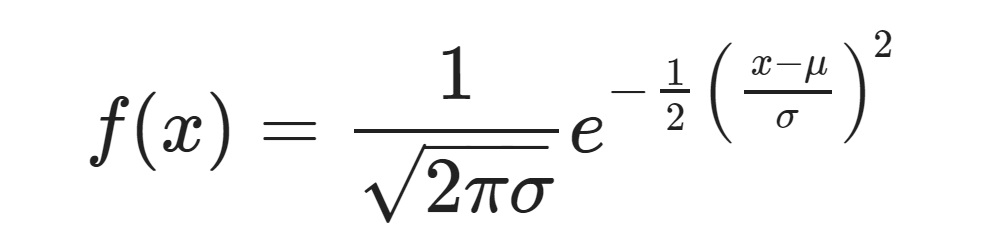

Teremos a função de x, a variável normalmente distribuída, o σ é o desvio padrão e o µ é a média, e a probabilidade é a área obtida abaixo da curva delimitada pelos Limites Inferior chamado Li e Superior Ls.

Essa área é calculada da seguinte forma usando Integrais Definidas:

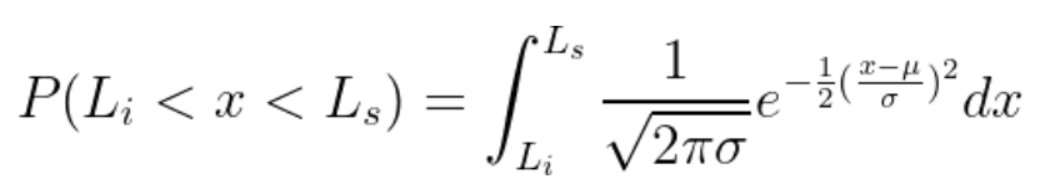

Não precisaremos calcular Integrais aqui, pois está fora do escopo do nosso curso.

Então veremos uma forma de calcular isso mais fácil utilizando Python como fizemos com as outras Distribuições, e faremos um cálculo manual usando Tabelas Padronizadas no próximo passo.

Em nosso caso mais simples, da probabilidade de alguém ter entre 1.60 e 1.80 metros de altura: 1.60 metros corresponderá ao Limite Inferior, enquanto 1.80 metros será o Limite Superior.

Descobriremos justamente o valor da área representando o cálculo da probabilidade dentro desse limite.

A seguir, abordaremos as Tabelas Padronizadas, as quais são uma forma manual de obtermos esses valores sem precisarmos calcular Integrais Definidas.

# Usando a tabela padronizada

Neste passo, falaremos sobre as Tabelas Padronizadas.

Conheceremos a forma de obter a área sob a curva que representa a probabilidade que estamos interessados, e isso sem precisarmos calcular Integrais Definidas.

Já sabemos que a Distribuição Normal é definida pela sua média e pelo desvio padrão, então cada variável aleatória que se distribui normalmente tem uma média e um desvio padrão específicos, ou seja, vão gerar curvas de formatos diferentes e específicos.

Se tivermos que calcular essas probabilidades para cada curva, teremos também que calcular as Integrais Definidas para cada uma, o que torna o trabalho mais complicado.

Pra resolvermos esse problema, podemos usar as Tabelas Padronizadas; para consultarmos as que já têm os valores das probabilidades definidos, precisaremos transformar a variável em uma variável normal padronizada, como mostra a fórmula:

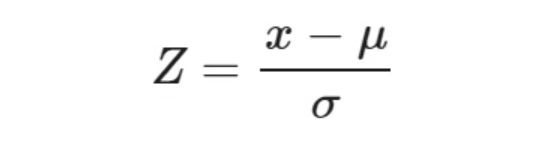

Partiremos de x como nossa variável original, e a transformaremos em Z; pegaremos x e subtrairemos a média da variável μ e dividiremos pelo seu desvio padrão σ.

Isto padronizará a variável para futuramente podermos consultar a tabela e solucionar o problema proposto. Em livros de Estatística, poderemos encontrar as diversas Tabelas de Distribuições de Probabilidade.

Aqui, conheceremos uma forma de obtermos nossa própria tabela, a qual terá basicamente o mesmo valor da encontrada no livro. Criaremos um DataFrame onde colocaremos esses valores de probabilidade.

Nesta consulta, somaremos os valores das linhas com os das colunas para obtermos o Z e buscar na tabela. Ele vai de 0 até 3.90, então cobre praticamente 100% da Distribuição.

O valor da probabilidade que está aqui dentro será a área sob a curva, a qual vai de menos infinito até o valor da variável padronizada que encontramos, ou seja, até Z.

Algumas tabelas podem estar um pouco diferentes das do livro, pois algumas mostrarão a média que é o valor central, o qual parte a Distribuição ao meio porque é simétrica em relação a média.

O valor da tabela vai da média até Z, mas isso não é um problema; afinal bastará somarmos 0.5 com o valor da da média até Z. Com o tempo, entenderemos melhor os macetes.

Já conhecemos a construção da tabela neste passo, a qual pode ser encontrada na parte "Construindo tabela normal padronizada" de nosso notebook. Também teremos o código de criação do DataFrame com a novidade da importação de norm a partir da biblioteca scipy.stats, que entenderemos melhor a seguir.

## <font color=red>Problema</font>
***

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

## <font color=green>2.3 Distribuição Normal</font>
***

A distribuição normal é uma das mais utilizadas em estatística. É uma distribuição contínua, onde a distribuição de frequências de uma variável quantitativa apresenta a forma de sino e é simétrica em relação a sua média.

![Normal](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img001.png)

### Características importantes

1. É simétrica em torno da média;

2. A área sob a curva corresponde à proporção 1 ou 100%;

3. As medidas de tendência central (média, mediana e moda) apresentam o mesmo valor;

4. Os extremos da curva tendem ao infinito em ambas as direções e, teoricamente, jamais tocam o eixo $x$;

5. O desvio padrão define o achatamento e largura da distribuição. Curvas mais largas e mais achatadas apresentam valores maiores de desvio padrão;

6. A distribuição é definida por sua média e desvio padrão;

7. A probabilidade sempre será igual à área sob a curva, delimitada pelos limites inferior e superior.

# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

A probabilidade é obtida a partir da área sob a curva, delimitada pelos limites inferior e superior especificados. Um exemplo pode ser visto na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img002.png)


Para obter a área acima basta calcular a integral da função para os intervalos determinados. Conforme equação abaixo:

# $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

$L_i$ = limite inferior = 1,60m

$L_s$ = limite superior = 1,80m

### Tabelas padronizadas

Neste passo, falaremos sobre as Tabelas Padronizadas.

Conheceremos a forma de obter a área sob a curva que representa a probabilidade que estamos interessados, e isso sem precisarmos calcular Integrais Definidas.

Já sabemos que a Distribuição Normal é definida pela sua média e pelo desvio padrão, então cada variável aleatória que se distribui normalmente tem uma média e um desvio padrão específicos, ou seja, vão gerar curvas de formatos diferentes e específicos.

Se tivermos que calcular essas probabilidades para cada curva, teremos também que calcular as Integrais Definidas para cada uma, o que torna o trabalho mais complicado.

Pra resolvermos esse problema, podemos usar as Tabelas Padronizadas; para consultarmos as que já têm os valores das probabilidades definidos, precisaremos transformar a variável em uma variável normal padronizada, como mostra a fórmula:

As tabelas padronizadas foram criadas para facilitar a obtenção dos valores das áreas sob a curva normal e eliminar a necessidade de solucionar integrais definidas.

Para consultarmos os valores em uma tabela padronizada basta transformarmos nossa variável em uma variável padronizada $Z$.

Esta variável $Z$ representa o afastamento em desvios padrões de um valor da variável original em relação à média.

# $$Z = \frac{x-\mu}{\sigma}$$

Onde:

$x$ = variável normal com média $\mu$ e desvio padrão $\sigma$

$\sigma$ = desvio padrão

$\mu$ = média

### Construindo tabela normal padronizada
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [],
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


A área que estamos procurando está sob a curva normal. O pico está na média de 1,70 metros partindo a distribuição exatamente ao meio. Deste ponto em diante, sabemos que estão 50%, então a probabilidade até este é de 0.5.

Porém, ainda não sabemos a distância entre o ponto do problema em 1,80 metros até a média, e deveremos descobrir com a tabela padronizada em mente, calculando de menos infinito até Z.

Padronizaremos essa variável para consultarmos a tabela e sabermos a área que vai de menos infinito até a variável original em 1,80 metros.

Na parte "Obter a variável padronizada Z" do notebook, o problema já nos diz que a media será igual a 1.7 metros.

<img src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img003.png' width='250px'>

A tabela acima fornece a área sob a curva entre $-\infty$ e $Z$ desvios padrão acima da média. Lembrando que por se tratar de valores padronizados temos $\mu = 0$.

## <font color='blue'>Exemplo: Qual sua altura?</font>

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

### Problema A - Identificação da área sob a curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img004.png' width='350px'>

### Obter a variável padronizada $Z$

Na parte "Obter a variável padronizada Z" do notebook, o problema já nos diz que a media será igual a 1.7 metros.

In [ ]:
media = 1.7
media

1.7

Na célula seguinte, o desvio_padrao é 0.1.

In [ ]:
desvio_padrao = 0.1
desvio_padrao

0.1

Segundo a fórmula, sabemos que Z é igual a x da variável original 1.8 menos a media dividido pelo desvio_padrao. Então digitaremos o cálculo:

In [ ]:
Z = (1.8 - media) / desvio_padrao
Z

1.0000000000000009

Como retorno, saberemos que Z é igual a praticamente 1.0.

Para consultarmos a tabela e obtermos a probabilidade na "Solução 1 - Utilizando tabela", escreveremos que a variável probabilidade será igual ao valor consultado.

O Z será construído com a soma do valor da linha com o da coluna. Por exemplo, se tivermos Z igual a 0.15 e encontrarmos a linha onde Z é 0.1, deveremos saber quanto falta para chegarmos no 0.15, ou seja, faltam 0.05.

Na tabela criada com o DataFrame na parte "Construindo tabela normal padronizada", pegaremos o valor da coluna 0.05 que cruza com o correspondente a linha 0.10 da coluna Z.

Neste exemplo, pegaríamos o valor 0.5596 correspondente a Z igual a 0.15.

Em nosso problema, não precisaremos fazer esta soma porque Z foi igual a 1. Ou seja, iremos até a linha 1.00 da coluna Z e cruzaremos com o valor da coluna 0.00.

Com isso, teremos o valor 0.8413 que queríamos, então o copiaremos para dentro da variável probabilidade na "Solução 1".

### Solução 1 - Utilizando tabela

In [ ]:
probabilidade = 0.8413
probabilidade

0.8413

Portanto, a chance de encontrarmos alguém com menos de 1,80 metros de altura selecionando aleatoriamente é de 84.13%.

Conheceremos uma forma mais simples de fazer este cálculo utilizando o SciPy, então importaremos norm da biblioteca scipy.stats em "Solução 2" para ficar bem claro.

### Solução 2 - Utilizando Scipy

In [ ]:
from scipy.stats import norm
norm.cdf(Z)

np.float64(0.8413447460685431)

Nesta mesma parte do notebook, encontraremos um [link para a documentação deste método](https://).

Precisaremos justamente encontrar o .cdf() que corresponde a cumulative distribution function, o qual é usado para preencher as células do DataFrame.

Na linha seguinte da célula, chamaremos norm com .cdf() recebendo o Z encontrado na tabela. Pode ser que apareça um valor um pouco diferente porque está usando outro tipo e não a tabela que geramos, a qual está arredondada e simplificada para nosso problema.

In [ ]:
from scipy.stats import norm
norm.cdf(Z)

np.float64(0.8413447460685431)

Como retorno, teremos basicamente as mesmas primeiras casas decimais 0.8413, pois o Z não é exatamente 1 e sim 1.0000000000000009 para um cálculo mais exato. Caálculo exato é utilizando Python, pela tabela obtemos um valor pr´ximo.

De qualquer maneira, conseguimos obter o resultado com boa precisão utilizando a tabela manualmente, mas hoje em dia é bem mais comum o uso do computador(utilizando Python) para fazermos os cálculos, como acabamos de aprender utilizando Python.

A seguir, resolveremos a questão "B" do nosso problema.

***
# <font color=green size=10>Prova de estatística</font>
***



A aplicação de uma prova de estatística em um concurso apresentou um conjunto de notas normalmente distribuídas. Verificou-se que o conjunto de notas tinha média 70 e desvio padrão de 5 pontos.

Qual a probabilidade de um aluno, selecionado ao acaso, ter nota menor que 85?

Neste caso, a nota de 85 corresponde a 3 desvios padrão acima da média (85 - 70 = 15, 15 / 5 = 3). Consultando a tabela, encontramos que a probabilidade de uma nota estar abaixo de 3 desvios padrão da média é de aproximadamente 99,87%.

In [ ]:
# Podemos calcular essa probabilidade usando Python:

import scipy.stats as stats

media = 70
desvio_padrao = 5
x = 85

z = (x - media) / desvio_padrao
probabilidade = stats.norm.cdf(z)

print(f"A probabilidade de um aluno ter nota menor que {x} é: {probabilidade:.4f}")

A probabilidade de um aluno ter nota menor que 85 é: 0.9987


## Padronização

Calcular a probabilidade usando a padronização da distribuição normal. Isso envolve converter o valor x em um valor Z, que é o número de desvios padrão que x está afastado da média:

Z = (x - μ) / σ

## Cálculo da Probabilidade

Vamos calcular o valor Z para x = 85:

Z = (85 - 70) / 5 = 3

Agora, podemos usar uma tabela de distribuição normal padrão ou uma função de distribuição acumulada para calcular a probabilidade:

P(X < 85) = P(Z < 3)

### Problema B - Identificação da área sob a curva

Continuando com a solução do nosso problema, partiremos para a questão "B" que nos pede a probabilidade de uma pessoa selecionada ao acaso de ter entre 1,60 e 1,80 metros de altura.

Nesta representação, a área destacada sob a curva é o que procuramos.

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img005.png' width='350px'>

Sabemos que a média é 1.7. Para 1.8, temos uma diferença de 10 centímetros, e notaremos esta mesma diferença de 1.6 para a média também.

Como a variável normal é simétrica, os lados divididos pela média são iguais, ou seja 50% para cada um. Com isso, concluímos que a área entre 1.7 e 1.8 metros é a mesma de entre 1.6 e 1.7.

Logo, obteremos essa primeira área entre 1.7 e 1.8 e depois multiplicaremos por 2 para termos a área total questionada.

Já calculamos a variável padronizada para 1.8, a qual vai de 0 até 4. Na célula da parte "Obter a variável padronizada Z" criaremos Z com o valor da média 1.7, que menos a média dará 0.

### Obter a variável padronizada $Z$

Sabemos que a média é 1.7. Para 1.8, temos uma diferença de 10 centímetros, e notaremos esta mesma diferença de 1.6 para a média também.

Como a variável normal é simétrica, os lados divididos pela média são iguais, ou seja 50% para cada um. Com isso, concluímos que a área entre 1.7 e 1.8 metros é a mesma de entre 1.6 e 1.7.

Logo, obteremos essa primeira área entre 1.7 e 1.8 e depois multiplicaremos por 2 para termos a área total questionada.

Já calculamos a variável padronizada para 1.8, a qual vai de 0 até 4. Na célula da parte "Obter a variável padronizada Z" criaremos Z com o valor da média 1.7, que menos a média dará 0.

In [ ]:
Z = (1.7 - media) / desvio_padrao
Z

0.0

Ou seja, se consultamos a tabela na linha 0.00 e coluna 0.00, teremos o valor de 50%.

Para calcularmos exatamente a área que precisamos, pegaremos a área de menos infinito até 1.8 e diminuiremos o valor de menos infinito até 1.7 relativa a metade como vimos na tabela.

Calcularemos outro Z de 1.80 como fizemos anteriormente, cujo resultado será aproximadamente 1 e a probabilidade 0,843.

In [ ]:
probabilidade = 0.843

Como agora queremos somente o valor de 1.7 até 1.8, teremos que tirar todo o valor da probabilidade de 0.5 relativo a área de menos infinito até a metade.

In [ ]:
probabilidade = 0.8413 - 0.5
probabilidade

0.34130000000000005

In [ ]:
Z = (1.8 - media) / desvio_padrao
Z

1.0000000000000009

In [ ]:
Z_inferior = (1.6 - media) / desvio_padrao
round(Z_inferior, 2)

-1.0

Ou seja, se consultamos a tabela na linha 0.00 e coluna 0.00, teremos o valor de 50%.

Para calcularmos exatamente a área que precisamos, pegaremos a área de menos infinito até 1.8 e diminuiremos o valor de menos infinito até 1.7 relativa a metade como vimos na tabela.

Calcularemos outro Z de 1.80 como fizemos anteriormente, cujo resultado será aproximadamente 1 e a probabilidade 0,843.

In [ ]:
Z_superior = (1.8 - media) / desvio_padrao
round(Z_superior, 2)

1.0

### Solução 1 - Utilizando tabela

Como agora queremos somente o valor de 1.7 até 1.8, teremos que tirar todo o valor da probabilidade de 0.5 relativo a área de menos infinito até a metade.

In [ ]:
probabilidade = 0.8413 - 0.5
probabilidade

0.34130000000000005

O valor da área da média 1.7 até 1.8 é de aproximadamente 0,3413. Como concluímos que este valor é exatamente igual ao da área entre 1.6 e 1.7, bastará apenas multiplicá-lo por 2.

In [ ]:
probabilidade = (0.8413 - 0.5) * 2
probabilidade

0.6826000000000001

In [ ]:
probabilidade = 0.8413 - (1 - 0.8413)
probabilidade

0.6826000000000001

Com isso, teremos o valor de 0.6826.

Outra forma de fazer isso é usando o método .cdf() do SciPy novamente. Transformaremos o cálculo de Z como 1.8 para Z_superior relativo ao Limite Superior.

### Solução 2 - Utilizando Scipy

In [ ]:
probabilidade = norm.cdf(Z_superior) - (1 - norm.cdf(Z_superior))
probabilidade

np.float64(0.6826894921370863)

In [ ]:
Z_superior = (1.8 - media) / desvio_padrao
Z_superior

1.0000000000000009

Já o Limite Inferior será calculado com o Z_inferior pegando a variável original 1.6. Faremos o arredondamento com round() recebendo as variáveis para obtermos números mais simples e 2 para as casas decimais.

In [ ]:
Z_inferior = (1.6 - media) / desvio_padrao
round(Z_inferior, 2)

-1.0

In [ ]:
Z_superior = (1.8 - media) / desvio_padrao
round(Z_superior, 2)

1.0

Como retorno das células, receberemos -1.0 e 1.0 respectivamente, confirmando que são áreas iguais.

Usando o .cdf(), podemos fazer o cálculo de duas formas; uma delas é com a variável probabilidade igual a norm com .cdf()recebendo o Z_superior.

In [ ]:
probabilidade = norm.cdf(Z_superior)
probabilidade

np.float64(0.8413447460685431)

Notaremos que essa mesma área que queremos retirar é idêntica a área de 1.8 em diante, já que se trata de uma curva simétrica.

Portanto, a probabilidade será norm.cdf(Z_superior) menos 1 que subtrai este mesmo norm.cdf(Z_superior).

In [ ]:
probabilidade = norm.cdf(Z_superior) - (1- norm.cdf(Z_superior))

Ao rodarmos, teremos o valor de 0.6826, lembrando que não está com a mesma precisão porque estamos usando a tabela.

Seria como calcular a probabilidade utilizando nossa tabela como fizemos na "Solução 1".

In [ ]:
probabilidade = 0.8413 - (1 - 0.8413)
probabilidade

0.6826000000000001

Com isso, teremos o mesmo o valor de 0.6826.

Há ainda outra forma mais simples ainda oferecida pelo SciPy, o qual utiliza os Limites Inferiores e Superiores para calcular a metade.

A probabilidade será igual a norm.cdf(Z_superior) menos norm.cdf(Z_inferior).

In [ ]:
probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
probabilidade

np.float64(0.6826894921370857)

Ao executarmos, receberemos o mesmo valor aproximado de 0.6826, ou seja, a chance de cerca de 68,26% de selecionarmos aleatoriamente alguém com altura entre 1,60 e 1,80 metros.

## Faturamento diário

O faturamento diário de um motorista de aplicativo segue uma distribuição aproximadamente normal, com média R$ 300,00 e desvio padrão igual a R$ 50,00. Obtenha as probabilidades de que, em um dia aleatório, o motorista ganhe:

1) Entre R$ 250,00 e R$ 350,00

2) Entre R$ 400,00 e R$ 500,00

In [ ]:
from scipy.stats import norm

media = 300
desvio_padrao = 50
Z_inferior = (250 - media) / desvio_padrao
Z_superior = (350 - media) / desvio_padrao

probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
print("{0:.2%}".format(probabilidade))

# Resp.: 68,27%

68.27%


In [ ]:
from scipy.stats import norm

media = 300
desvio_padrao = 50
Z_inferior = (400 - media) / desvio_padrao
Z_superior = (500 - media) / desvio_padrao

probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
print("{0:.2%}".format(probabilidade))

# Resp.: 2,27%

2.27%


In [ ]:
import scipy.stats as stats

media = 300
desvio_padrao = 50

# 1) Entre R$ 250,00 e R$ 350,00
x_inferior = 250
x_superior = 350
z_inferior = (x_inferior - media) / desvio_padrao
z_superior = (x_superior - media) / desvio_padrao
probabilidade1 = stats.norm.cdf(z_superior) - stats.norm.cdf(z_inferior)

# 2) Entre R$ 400,00 e R$ 500,00
x_inferior = 400
x_superior = 500
z_inferior = (x_inferior - media) / desvio_padrao
z_superior = (x_superior - media) / desvio_padrao
probabilidade2 = stats.norm.cdf(z_superior) - stats.norm.cdf(z_inferior)

print(f"A probabilidade de ganhar entre R$ 250,00 e R$ 350,00 é: {probabilidade1:.4f}")
print(f"A probabilidade de ganhar entre R$ 400,00 e R$ 500,00 é: {probabilidade2:.4f}")

# Resp.: A probabilidade de ganhar entre R$ 250,00 e R$ 350,00 é: 0.6827
# A probabilidade de ganhar entre R$ 400,00 e R$ 500,00 é: 0.0227

A probabilidade de ganhar entre R$ 250,00 e R$ 350,00 é: 0.6827
A probabilidade de ganhar entre R$ 400,00 e R$ 500,00 é: 0.0227


A probabilidade de ganhar entre R$ 250,00 e R$ 350,00 é: 0.6827
A probabilidade de ganhar entre R$ 400,00 e R$ 500,00 é: 0.0227

Como retorno, receberemos o mesmo valor relativo aos 2,27% da probabilidade de selecionar ao acaso uma pessoa com mais de 1,90 metros.

Isso é muito importante, pois a seguir abordaremos a Amostragem e a Estimação, o que servirá de base para Teste de Hipótese, Regressão e outros processos de Estatística em cursos posteriores.

### Problema C - Identificação da área sob a curva

O último item do nosso problema pede a probabilidade de uma pessoa selecionada ao acaso ter mais de 1,90 metros.

Com esta representação, usaremos um raciocínio próximo do que fizemos no passo anterior, ou seja, queremos somente a área sob a curva a partir de 1.9.

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img006.png' width='350px'>

Conforme calculamos a área sob a curva entre os pontos 1.6 e 1.8 anteriormente ,e agora queremos apenas a área sob a curva a partir de 1.9, pegaremos 1 menos a área anterior a este ponto específico.

Na célula da parte "Obter a variável padronizada Z" em "Problema C", teremos um novo Z igual a 1.9 menos a média que foi definida na aula inicial dividido pelo desvio padrão.

Este novo Z será usado para consultar a tabela.

### Obter a variável padronizada $Z$

Sabemos que a média é 1.7. Para 1.8, temos uma diferença de 10 centímetros, e notaremos esta mesma diferença de 1.6 para a média também.

Como a variável normal é simétrica, os lados divididos pela média são iguais, ou seja 50% para cada um. Com isso, concluímos que a área entre 1.7 e 1.8 metros é a mesma de entre 1.6 e 1.7.

Logo, obteremos essa primeira área entre 1.7 e 1.8 e depois multiplicaremos por 2 para termos a área total questionada.

Já calculamos a variável padronizada para 1.8, a qual vai de 0 até 4. Na célula da parte "Obter a variável padronizada Z" criaremos Z com o valor da média 1.7, que menos a média dará 0.

In [ ]:
Z = (1.7 - media) / desvio_padrao
Z

0.0

Ou seja, se consultamos a tabela na linha 0.00 e coluna 0.00, teremos o valor de 50%.

Para calcularmos exatamente a área que precisamos, pegaremos a área de menos infinito até 1.8 e diminuiremos o valor de menos infinito até 1.7 relativa a metade como vimos na tabela.

Calcularemos outro Z de 1.80 como fizemos anteriormente, cujo resultado será aproximadamente 1 e a probabilidade 0,843.

In [ ]:
Z = (1.9 - media) / desvio_padrao
Z


1.9900000507450009

In [ ]:
probabilidade = 0.843

Como agora queremos somente o valor de 1.7 até 1.8, teremos que tirar todo o valor da probabilidade de 0.5 relativo a área de menos infinito até a metade.

In [ ]:
probabilidade = 0.8413 - 0.5
probabilidade

0.34130000000000005

O valor da área da média 1.7 até 1.8 é de aproximadamente 0,3413. Como concluímos que este valor é exatamente igual ao da área entre 1.6 e 1.7, bastará apenas multiplicá-lo por 2.

In [ ]:
probabilidade = (0.8413 - 0.5) * 2
probabilidade

0.6826000000000001

Com isso, teremos o valor de 0.6826.

Outra forma de fazer isso é usando o método .cdf() do SciPy novamente. Transformaremos o cálculo de Z como 1.8 para Z_superior relativo ao Limite Superior.

In [ ]:
Z_superior = (1.8 - media) / desvio_padrao
Z_superior

0.9950000253725015

Já o Limite Inferior será calculado com o Z_inferior pegando a variável original 1.6. Faremos o arredondamento com round() recebendo as variáveis para obtermos números mais simples e 2 para as casas decimais.

In [ ]:
Z_inferior = (1.6 - media) / desvio_padrao
round(Z_inferior, 2)

-1.0

In [ ]:
Z_superior = (1.8 - media) / desvio_padrao
round(Z_superior, 2)

1.0

Como retorno das células, receberemos -1.0 e 1.0 respectivamente, confirmando que são áreas iguais.

Usando o .cdf(), podemos fazer o cálculo de duas formas; uma delas é com a variável probabilidade igual a norm com .cdf()recebendo o Z_superior

In [ ]:
probabilidade = norm.cdf(Z_superior)
probabilidade

np.float64(0.8401318739946053)

Rodando a célula na "Solução 2" como está, teremos o mesmo resultado 0.8413.

In [ ]:
# Retiraremos a área que vai desde menos infinito até `1.6` para obtermos apenas a área que nos interessa, ou seja, A da chance de obtermos alguém entre 1,60 e 1,80 metros de altura.

Notaremos que essa mesma área que queremos retirar é idêntica a área de 1.8 em diante, já que se trata de uma curva simétrica.

Portanto, a probabilidade será norm.cdf(Z_superior) menos 1 que subtrai este mesmo norm.cdf(Z_superior).

In [ ]:
probabilidade = norm.cdf(Z_superior) - (1- norm.cdf(Z_superior))

Ao rodarmos, teremos o valor de 0.6826, lembrando que não está com a mesma precisão porque estamos usando a tabela.

Seria como calcular a probabilidade utilizando nossa tabela como fizemos na "Solução 1".

In [ ]:
probabilidade = 0.8413 - (1 - 0.8413)
probabilidade

0.6826000000000001

Com isso, teremos o mesmo o valor de 0.6826.

Há ainda outra forma mais simples ainda oferecida pelo SciPy, o qual utiliza os Limites Inferiores e Superiores para calcular a metade.

A probabilidade será igual a norm.cdf(Z_superior) menos norm.cdf(Z_inferior).

In [ ]:
probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
probabilidade

np.float64(0.68026374798921)

Ao executarmos, receberemos o mesmo valor aproximado de 0.6826, ou seja, a chance de cerca de 68,26% de selecionarmos aleatoriamente alguém com altura entre 1,60 e 1,80 metros.

Rodando a célula, a probabilidade será de 0.0232, ou seja, apenas 2,32% de chance de termos alguém com mais de 1 metro e 90 centímetros de altura.

Usando o norm do SciPy na parte "Solução 2" e o mesmo raciocínio aplicado na probabilidade, digitaremos 1 menos norm.cdf() recebendo o Z

Em seguida, exibiremos o resultado e rodaremos a célula.

### Solução 1 - Utilizando tabela

In [ ]:
probabilidade = 1 - 0.9772
probabilidade

0.022800000000000042

In [ ]:
probabilidade = 1 - norm.cdf(Z)
probabilidade

np.float64(0.023295464955233047)

### Solução 2 - Utilizando Scipy

In [ ]:
from scipy.stats import norm

probabilidade = 1 - norm.cdf(Z)
probabilidade

np.float64(0.023295464955233047)

Com isso, receberemos o retorno de 0.228 para a primeira célula e 0.0227 para a segunda, o que é bem próximo.

Outra forma usando .cdf() será passarmos um valor negativo para Z, pois o método consegue entender que estamos justamente querendo calcular a probabilidade contrária, ou seja, a partir dos 1.9 da curva.

Para obtermos esse mesmo resultado, retiraremos a subtração de 1 e passaremos um -Z negativo para norm.cdf().

In [ ]:
probabilidade = norm.cdf(-Z)
probabilidade

np.float64(0.023295464955233013)

## Vida útil

O Inmetro verificou que as lâmpadas incandescentes da fabricante XPTO apresentam uma vida útil normalmente distribuída, com média igual a 720 dias e desvio padrão igual a 30 dias. Calcule a probabilidade de uma lâmpada, escolhida ao acaso, durar:

1) Entre 650 e 750 dias

2) Mais que 800 dias

3) Menos que 700 dias

In [ ]:
from scipy.stats import norm

media = 720
desvio_padrao = 30

# Item A
Z_inferior = (650 - media) / desvio_padrao
Z_superior = (750 - media) / desvio_padrao

probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
print("{0:.2%}".format(probabilidade))

# Item B
Z = (800 - media) / desvio_padrao

probabilidade = 1 - norm.cdf(Z)
print("{0:.2%}".format(probabilidade))

# Item C
Z = (700 - media) / desvio_padrao

probabilidade = norm.cdf(Z)
print("{0:.2%}".format(probabilidade))

83.15%
0.38%
25.25%


Distribuição Normal

Esse é um problema clássico de distribuição normal, que é usada para modelar variáveis aleatórias contínuas que seguem uma curva em forma de sino.

Cálculo das Probabilidades

Vamos calcular as probabilidades usando a padronização da distribuição normal.

1) Entre 650 e 750 dias

Primeiro, vamos calcular os valores Z para os limites inferior e superior:

Z_inferior = (650 - 720) / 30 = -2.33
Z_superior = (750 - 720) / 30 = 1

Agora, podemos usar uma tabela de distribuição normal padrão ou uma função de distribuição acumulada para calcular a probabilidade:

P(650 < X < 750) = P(-2.33 < Z < 1)
= P(Z < 1) - P(Z < -2.33)

2) Mais que 800 dias

Vamos calcular o valor Z para o limite inferior:

Z = (800 - 720) / 30 = 2.67

Agora, podemos calcular a probabilidade:

P(X > 800) = P(Z > 2.67)
= 1 - P(Z < 2.67)

3) Menos que 700 dias

Vamos calcular o valor Z para o limite superior:

Z = (700 - 720) / 30 = -0.67

Agora, podemos calcular a probabilidade:

P(X < 700) = P(Z < -0.67)

Implementação em Python

Podemos calcular essas probabilidades usando Python:

import scipy.stats as stats

media = 720
desvio_padrao = 30

# 1) Entre 650 e 750 dias
x_inferior = 650
x_superior = 750
z_inferior = (x_inferior - media) / desvio_padrao
z_superior = (x_superior - media) / desvio_padrao
probabilidade1 = stats.norm.cdf(z_superior) - stats.norm.cdf(z_inferior)

# 2) Mais que 800 dias
x = 800
z = (x - media) / desvio_padrao
probabilidade2 = 1 - stats.norm.cdf(z)

# 3) Menos que 700 dias
x = 700
z = (x - media) / desvio_padrao
probabilidade3 = stats.norm.cdf(z)

print(f"A probabilidade de durar entre 650 e 750 dias é: {probabilidade1:.4f}")
print(f"A probabilidade de durar mais que 800 dias é: {probabilidade2:.4f}")
print(f"A probabilidade de durar menos que 700 dias é: {probabilidade3:.4f}")


Resultados

As probabilidades são calculadas e impressas pelo código acima. Os resultados serão números entre 0 e 1, representando as probabilidades.

Nesse caso, as probabilidades são:

- P(650 < X < 750) ≈ 0.8340
- P(X > 800) ≈ 0.0038
- P(X < 700) ≈ 0.2514

Esses resultados indicam que:

- Aproximadamente 83,40% das lâmpadas durarão entre 650 e 750 dias.
- Aproximadamente 0,38% das lâmpadas durarão mais que 800 dias.
- Aproximadamente 25,14% das lâmpadas durarão menos que 700 dias.

In [ ]:
import scipy.stats as stats

media = 720
desvio_padrao = 30

# 1) Entre 650 e 750 dias
x_inferior = 650
x_superior = 750
z_inferior = (x_inferior - media) / desvio_padrao
z_superior = (x_superior - media) / desvio_padrao
probabilidade1 = stats.norm.cdf(z_superior) - stats.norm.cdf(z_inferior)

# 2) Mais que 800 dias
x = 800
z = (x - media) / desvio_padrao
probabilidade2 = 1 - stats.norm.cdf(z)

# 3) Menos que 700 dias
x = 700
z = (x - media) / desvio_padrao
probabilidade3 = stats.norm.cdf(z)

print(f"A probabilidade de durar entre 650 e 750 dias é: {probabilidade1:.4f}")
print(f"A probabilidade de durar mais que 800 dias é: {probabilidade2:.4f}")
print(f"A probabilidade de durar menos que 700 dias é: {probabilidade3:.4f}")


A probabilidade de durar entre 650 e 750 dias é: 0.8315
A probabilidade de durar mais que 800 dias é: 0.0038
A probabilidade de durar menos que 700 dias é: 0.2525


## Obtendo probabilidades

Utilizando a tabela padronizada, ou o ferramental disponibilizado pelo Python, encontre a área sob a curva normal para os valores de Z abaixo:

1) Z < 1,96

2) Z > 2,15

3) Z < -0,78

4) Z > 0,59

In [ ]:
from scipy.stats import norm

# Item A
probabilidade = norm.cdf(1.96)
print("{0:0.4f}".format(probabilidade))

# Item B
probabilidade = 1 - norm.cdf(2.15)
# ou -> probabilidade = norm.sf(2.15)
print("{0:0.4f}".format(probabilidade))

# Item C
probabilidade = norm.cdf(-0.78)
print("{0:0.4f}".format(probabilidade))

# Item D
probabilidade = 1 - norm.cdf(0.59)
# ou -> probabilidade = norm.sf(0.59)
print("{0:0.4f}".format(probabilidade))

0.9750
0.0158
0.2177
0.2776


Como retorno, receberemos o mesmo valor relativo aos 2,27% da probabilidade de selecionar ao acaso uma pessoa com mais de 1,90 metros.

Isso é muito importante, pois a seguir abordaremos a Amostragem e a Estimação, o que servirá de base para Teste de Hipótese, Regressão e outros processos de Estatística em cursos posteriores.

## O que aprendemos?

Nesta aula, aprendemos:

   - Os conceitos básicos da distribuição normal de probabilidades

   - A trabalhar com a tabela padronizada Z

   - A obter as probabilidades utilizando a distribuição normal em um conjunto de situações

# <font color=green size=10>Aula 4  - AMOSTRAGEM</font>
***

## <font color=green>4.1 População e Amostra</font>
***

Começando uma sessão nova no nosso curso, abordaremos a Amostragem.

Para entendermos sua importância, é interessante sabermos que geralmente estamos lidando com Amostras em Estatística e raramente com a População. Por isso é importante aprendermos bem os conceitos para calcularmos o tamanho de Amostra quando estivermos abordando Estimação.

População é um conjunto de todos os elementos de interesse em um estudo, e diversos elementos podem compor uma população como pessoas, idades, alturas, carros e etc.

Com relação ao tamanho, as populações podem ser tanto limitadas e conhecidas como Populações Finitas, as quais nos permitem fazer contagem como os alunos de uma escola, funcionários de uma empresa e etc., ou também ilimitadas chamadas de Populações Infinitas, que não possibilita uma contagem, como as gotas de um oceano.

Quando as Populações Finitas são contáveis mas muito grandes e extensas, eventualmente assumimos que são Infinitas. A amostra precisa ser um subconjunto realmente representativo de uma População para ter o valor que a represente de fato.

Do contrário, não conseguiremos tirar uma conclusão dos parâmetros de uma População a partir da Amostra caso esta não seja representativa nem tenha um tamanho adequado o suficiente, ou ainda se não tiver sido utilizada uma técnica adequada para sua extração e etc.

Parâmetros da População são atributos numéricos, como a média e o desvio padrão; o foco de inferência estatística é justamente criar Testes de Hipótese e estimar parâmetros a partir de Amostras, como veremos em Estimação.

Na parte "4.2 Quando utilizar uma amostra?" de nosso notebook, teremos alguns casos mais claros para começarmos a entender quando que devemos utilizar Amostra e não sempre toda a População.

Um exemplo bem interessante são os famosos testes destrutivos, como os testes que os engenheiros fazem com carro utilizando um boneco e simulando um acidente para verificar questões de segurança, o que obviamente não pode ser realizado com todos os automóveis produzidos na fábrica.

Outro caso seria com as pesquisas de intenção de votos em uma eleição, as quais devem apresentar novos resultados rapidamente. Se este censo fosse feito com toda a população votante, teríamos o resultado final da própria eleição.

A seguir, falaremos sobre Técnica de Amostragem, Amostra Aleatória Simples e outros assuntos.

### População
Conjunto de todos os elementos de interesse em um estudo. Diversos elementos podem compor uma população, por exemplo: pessoas, idades, alturas, carros etc.

Com relação ao tamanho, as populações podem ser limitadas (populações finitas) ou ilimitadas (populações infinitas).

### Populações finitas

Permitem a contagem de seus elementos. Como exemplos temos o número de funcionário de uma empresa, a quantidade de alunos em uma escola etc.

### Populações infinitas

Não é possível contar seus elementos. Como exemplos temos a quantidade de porções que se pode extrair da água do mar para uma análise, temperatura medida em cada ponto de um território etc.

<font color=red>Quando os elementos de uma população puderem ser contados, porém apresentando uma quantidade muito grande, assume-se a população como infinita.</font>.

### Amostra
Subconjunto representativo da população.

Os atributos numéricos de uma população como sua média, variância e desvio padrão, são conhecidos como **parâmetros**. O principal foco da inferência estatística é justamente gerar estimativas e testar hipóteses sobre os parâmetros populacionais utilizando as informações de amostras.

## <font color=green>4.2 Quando utilizar uma amostra?</font>
***

### Populações infinitas

O estudo não chegaria nunca ao fim. Não é possível investigar todos os elementos da população.

### Testes destrutivos

Estudos onde os elementos avaliados são totalmente consumidos ou destruídos. Exemplo: testes de vida útil, testes de segurança contra colisões em automóveis.

### Resultados rápidos

Pesquisas que precisam de mais agilidade na divulgação. Exemplo: pesquisas de opinião, pesquisas que envolvam problemas de saúde pública.

### Custos elevados

Quando a população é finita mas muito numerosa, o custo de um censo pode tornar o processo inviável.

## <font color=green>3.3 Amostragem Aleatória Simples</font>
***

É uma das principais maneiras de se extrair uma amostra de uma população. A exigência fundamental deste tipo de abordagem é que cada elemeto da população tenha as mesmas chances de ser selecionado para fazer parte da amostra.

Neste passo, abordaremos a Seleção de Amostra com uma técnica conhecida como Amostragem Aleatória Simples.

A exigência principal é que cada elemento da população tenha exatamente a mesma chance de ser selecionado para fazer parte na Amostra.

Anteriormente, falamos que uma Amostra tem que ser representativa, onde a chance de selecionarmos uma pessoa com determinada característica na População deve ser a mesma chance de termos esta pessoa com esta mesma característica na Amostra.

Por exemplo, se temos uma População onde a proporção de homens é 40%, deveremos garantir um valor bem próximo a isso na Amostra. Obviamente não será idêntica, afinal há sempre uma margem de erro embutida quando fazemos uma Seleção de Amostra, e inclusive aprenderemos a calcular o tipo de erro quando estivermos falando de Cálculo de Tamanho de Amostra.

Na parte "4.3 Amostragem Aleatória Simples", conheceremos uma seleção aleatória utilizando uma funcionalidade do próprio dataframe Pandas.

Na primeira célula, pegaremos os dados e veremos seu tamanho com shape[] recebendo 0.

In [ ]:
dados.shape[0]

76840

Com isso, veremos que há 76840 registros ou observações, como se diz em Estatística.

Pegaremos a variável .Renda dos dados e tiraremos a média com .mean() para ser nosso parâmetro desta população.

In [ ]:
dados.Renda.mean()

np.float64(2000.3831988547631)

Como retorno, receberemos o valor aproximado de 2000.

Quando selecionamos uma Amostra, a utilizamos para fazermos inferências sobre esses parâmetros populacionais. Caso seja representativa com erro controlado, chegaremos a um valor próximo aos 2 mil que retornamos.

Haverá uma margem de erro e Nível de Significância ou Confiança, mas isso será visto mais adiante. Aqui lidaremos com apenas um exemplo para entendermos bem o funcionamento dos cálculos.

Criaremos uma Amostra Aleatória Simples com essa nossa população por meio de uma variável chamada amostra. Esta será igual a um novo dataframe com dados.sample().

Passaremos um tamanho de Amostra bem pequeno como o parâmetro n igual a apenas 100 dentro do método .sample().

Como segundo parâmetro, passaremos random_state igual ao valor 101. Este é como se fosse um seed de um gerador de número aleatório, então se tivermos o mesmo valor, teremos o resultado idêntico no notebook para compararmos.

In [ ]:
amostra = dados.sample(n = 1000, random_state = 101)

Vamos conferir o tamanho da amostra digitando amostra.shape[0] para confirmarmos se temos de fato 1000 registros.

In [ ]:
amostra.shape[0]

1000

In [ ]:
amostra.Renda.mean()

np.float64(1998.783)

Como retorno, nossa média da Amostra será de 1998.783, um pouco diferente do primeiro resultado.

Não usamos critério nenhum para selecionar o n, e deveremos garantir que a Amostra seja de fato representativa da População.

Faremos este teste com a suposição de que o gênero masculino compõe 40% da população total; selecionaremos a variável Sexo de dados e aplicaremos o mesmo .value_counts() que aprendemos quando estávamos criando Distribuições de Frequência no primeiro curso, mas usaremos em percentual e normalize igual a True.

dados.Sexo.value_counts(normalize = True)
Copiar código
Segundo nosso DataFrame, a identificação 0 representa o sexo masculino cuja porcentagem é relativa a aproximadamente 70% e 1 o feminino com 30%.

Supondo que seja a População, faremos a mesma técnica com a variável amostra para Sexo.

In [ ]:
dados.Sexo.value_counts(normalize = True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [ ]:
amostra.Sexo.value_counts(normalize = True)

0    0.706
1    0.294
Name: Sexo, dtype: float64

Como retorno, veremos que uma amostra tão pequena está apresentando uma proporção parecida com a que obtivemos da população, 70.6% de homens e 29.4% de mulheres.

Como não usamos nenhuma técnica para definir n, não temos certeza de que esse resultado próximo garante que seja uma Amostra representativa o suficiente.

Testaremos agora com n igual a 1000 dentro de .sample() e rodaremos tudo de novo.

In [ ]:
amostra = dados.sample(n = 1000, random_state = 101)

In [ ]:
amostra.shape[0]

1000

In [ ]:
amostra.Renda.mean()

np.float64(1998.783)

In [ ]:
amostra.Sexo.value_counts(normalize = True)

,proportion
Sexo,
0,0.706
1,0.294


A média passa a ser 1998.783 e as proporção mudam apenas um pouco, se mantendo próxima aos valores anteriores.

Quando estivermos fazendo as Estimações, veremos técnicas de Seleção de Tamanho de Amostra onde lidamos com uma margem de erro para controlar e calcular, gerando uma confiança de que o valor vai estar dentro de um intervalo.

A seguir, abordaremos as teorias sobre dois tipos de Seleção de Amostra bastante comuns.

Para finalizarmos o assunto Amostragem, abordaremos duas técnicas de Seleção de Amostra, conhecidas como Amostragem Estratificada e por Conglomerados.

Em nosso notebook, teremos um texto sobre cada uma delas. A ideia de ambas é justamente a melhoria do processo de Amostragem Simples que conhecemos.

No caso da Estratificada, a ideia é separar a população em grupos mais similares e mais homogêneos, onde dentro de cada um faremos uma seleção de uma amostra aleatória, ou até mesmo uma Estratificada dentro de cada grupo.

Por exemplo, separaremos a População em classes de renda, como classe A, B, C, D, e E, e dentro de cada uma selecionaremos uma Amostra Aleatória Simples.

No caso de Amostragem por Conglomerados, a ideia é basicamente a mesma, a diferença é que os grupos não são homogêneos, e sim são heterogêneos.

Um exemplo dessa técnica é a separação da População em grupos territoriais; se quisermos estudar os bairros de uma cidade, os separaremos em grupos de bairros onde selecionaremos uma Amostra Aleatória Simples dentro de cada um, ou até mesmo uma amostra estratificada dentro desse grupo, pois pode ser misturado também.

A seguir, vamos começar a falar de Estimação, Estimação Pontual, Intervalo de Confiança, Cálculo de Tamanho de Amostra, e etc.

## <font color=green>3.4 Amostragem Estratificada</font>
***

É uma melhoria do processo de amostragem aleatória simples. Neste método é proposta a divisão da população em subgrupos de elementos com características similares, ou seja, grupos mais homogêneos. Com estes subgrupos separados, aplica-se a técnica de amostragem aleatória simples dentro de cada subgrupo individualmente.

## <font color=green>4.5 Amostragem por Conglomerados</font>
***

Também visa melhorar o critério de amostragem aleatória simples. Na amostragem por conglomerados são também criados subgrupos, porém não serão homogêneas como na amostragem estratificada. Na amostragem por conglomerados os subgrupos serão heterogêneos, onde, em seguida, serão aplicadas a amostragem aleatória simples ou estratificada.

Um exemplo bastante comum de aplicação deste tipo de técnica é na divisão da população em grupos territoriais, onde os elementos investigados terão características bastante variadas.

## <font color=green>4.6 O que aprendemos <font color=green>

Nesta aula, aprendemos:

   - Os conceitos de população e amostra

   - A identificação de populações finita e infinita

   - Quando utilizar a técnica de amostragem em um estudo

   - Técnicas de seleção de amostra, como:

     - Amostragem aleatória simples

     - Amostragem estratificada

     - Amostragem por conglomerados

# <font color=green>5 ESTIMAÇÃO</font>
***

# <font color=green>5 Teorema do limite central</font>
***

Já aprendemos sobre a Amostragem e como selecionar uma amostra, e neste passo veremos como obter estimativas dos parâmetros de uma População a partir dos dados de Amostra, processo conhecido como Estimação.

Sabemos que os parâmetros da População são os atributos numéricos de População, como a nota média, desvio padrão e etc.

Agora estamos trabalhando com amostras, então existe uma margem de erro embutida por não estarmos trabalhando com dados completos da População total, e aprenderemos como calculá-lo.

As amostras pontuais são justamente o cálculo de uma média dentro de amostra e desvio padrão de amostra. Também aprenderemos a calcular Estimativas Intervalares e Intervalos de Confiança.

Na parte "5. Estimação", começaremos com o tipo de problema que já vínhamos lidando até agora para sabermos o que vamos aprender; suponhamos que os pesos dos sacos de arroz de uma indústria alimentícia se distribuam como uma Normal com desvio padrão populacional igual a 150 gramas.

Selecionando uma amostra aleatória de 20 sacos de um lote especifico, obteve-se o peso médio de 5 mil e 50 gramas para cada saco.

Deveremos construir um Intervalo de Confiança para a média populacional assumir Nível de Significância de 5%. Começaremos a estudar isso agora.

Antes de resolver, faremos uma abordagem teórica para começarmos a entender partes desse processo de Estimação, o que tem a ver com a construção do cálculo o Intervalo de Confiança, de um Erro Inferencial, e um tamanho de amostra utilizando informações que aprenderemos adiante.

Na parte "5.1" do nosso notebook, encontraremos o Teorema do Limite Central com a fórmula:

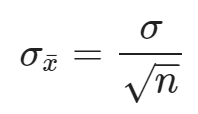

Este teorema afirma que, com o aumento do tamanho da amostra, a distribuição das média amostrais se aproxima de distribuição normal com média igual a da População e desvio padrão igual ao desvio padrão da variável original, divido pela raiz quadrada do tamanho da amostra, isso é assegurado para n maior ou igual a 30.

Passaremos por cada parte dessa afirmação para tentarmos entendê-lo bem.

O cálculo do Desvio Padrão das Médias Amostrais é conhecido como Erro Padrão da Média. Por isso estamos vendo um Teorema de Limite Central, o qual será muito importante para calcularmos o Erro Inferencial, Intervalo de Confiança e o tamanho de amostra.

Para entendermos o Limite Central na primeira célula desta parte do notebook, assumiremos que precisamos selecionar uma amostra do dataset que estamos trabalhando, os mesmos dados que importamos no começo do nosso curso.

Faremos n igual a 2000, ou seja, amostras do tamanho 2 mil. Repetindo o processo de Amostragem, a variável total_de_amostras será igual a 1500 para repetirmos mil e quinhentas seleções de 2 mil itens do dataset.

## <font color='red'>Problema </font>

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um **intervalo de confiança para a média populacional** assumindo um **nível de significância de 5%**.

---

É a forma de se fazer suposições generalizadas sobre os parâmetros de uma população tendo como base as informações de uma amostra.

- **Parâmetros** são os atributos numéricos de uma população, tal como a média, desvio padrão etc.

- **Estimativa** é o valor obtido para determinado parâmetro a partir dos dados de uma amostra da população.

## <font color=green>5.1 Teorema do limite central</font>
***

> O **Teorema do Limite Central** afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para $n$ maior ou igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

O desvio padrão das médias amostrais é conhecido como **erro padrão da média**

### Entendendo o Teorema do Limite Central

In [ ]:
n = 2000
total_de_amostras = 1500

Na célula seguinte, montaremos um DataFrame vazio chamado amostras com pd.DataFrame().

In [ ]:
amostras = pd.DataFrame()
amostras

""


O preencheremos com as amostras que criaremos agora. Com laço for para cada i em range() com o total_de_amostras para repetirmos o processo de Amostragem 1500 vezes com amostras de tamanho 2000.

Usaremos o underscore _ para não armazenarmos o resultado em lugar nenhum.

Chamaremos o dados que é o nosso dadaset com a variável Idade e o método .sample() para a primeira Amostragem de n, pois queremos amostras de tamanho 2 mil e nosso n é igual a 2000.

Antes, temos que fazer alguns ajustes para isso funcionar.

Como faremos a Seleção de Amostra, manteremos os índices dos registros que foram amostrados ou selecionados. O index será resetado e transformado em nova sequência numérica partindo de 0.

Logo, _.index será igual a range() com 0 e tamanho len() do underscore _. Com isso, falaremos que o índice será um intervalo de 0 ao tamanho total de 2000.

Em seguida, pegaremos a amostras[] e criaremos outra variável dentro chamada de 'Amostra_ com underscore. Concatenaremos com a amostra usando str(i) para termos um índice de cada iteração que estamos fazendo.

Por fim, atribuiremos ao _ criado e rodaremos chamando apenas amostras.

In [ ]:
for i in range(total_de_amostras):
  _ = dados.Idade.sample(n)
  _.index = range(0, len(_))
  amostras['Amostra_' + str(i)] = _

amostras

,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,...,Amostra_1490,Amostra_1491,Amostra_1492,Amostra_1493,Amostra_1494,Amostra_1495,Amostra_1496,Amostra_1497,Amostra_1498,Amostra_1499
0,28,44,50,46,38,51,25,53,39,25,...,37,49,53,48,40,34,57,38,51,51
1,26,34,62,36,43,56,39,41,51,36,...,39,54,40,44,57,59,49,45,58,57
2,28,43,60,45,40,40,47,55,22,57,...,42,57,25,57,29,45,46,35,46,36
3,48,22,28,32,38,41,37,35,39,31,...,57,43,40,31,41,55,47,72,29,61
4,29,27,57,36,33,67,63,32,59,39,...,51,52,19,35,50,43,19,37,29,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,69,54,51,20,50,45,40,48,49,45,...,37,29,34,38,27,37,41,41,45,44
1996,37,27,35,41,54,36,47,65,42,51,...,53,27,47,58,27,45,65,63,23,37
1997,35,38,31,43,51,43,40,24,43,70,...,53,35,61,59,50,43,26,46,57,51
1998,18,57,62,22,33,59,40,46,41,57,...,55,34,34,46,35,41,37,72,48,41


Como resultado, teremos uma tabela com 2 mil linhas e mil e 500 colunas, representando amostras de tamanho 2 mil repetidas mil e quinhentas vezes.

Com o aumento do tamanho da amostra, a Distribuição das Médias Amostrais se aproximam de uma Distribuição Normal.

Para entendermos melhor, chamaremos amostras com o método .mean() que tira a média de cada coluna da tabela com as duas mil amostras.

In [ ]:
amostras.mean()

,0
Amostra_0,43.7510
Amostra_1,43.7885
Amostra_2,43.9715
Amostra_3,44.5645
Amostra_4,44.4455
...,...
Amostra_1495,43.7435
Amostra_1496,43.8880
Amostra_1497,44.3810
Amostra_1498,43.9835


Para fazermos o Teorema do Limite Central, só precisamos usar o mesmo código anterior e rodar o histograma com .hist().

> O Teorema do Limite Central afirma que, **com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal** com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

<Axes: >

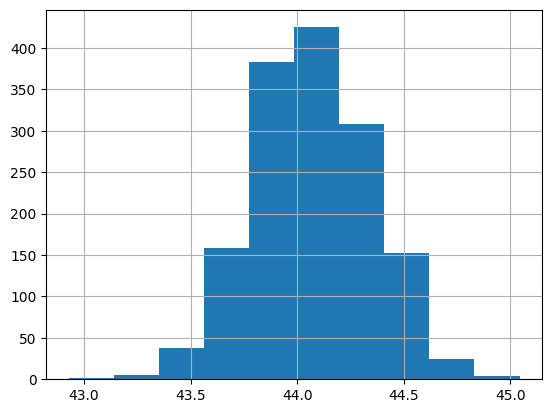

In [ ]:
amostras.mean().hist()

Notaremos o formato próximo a uma Distribuição Normal.

A média da População pode ser descoberta com dados.Idade.mean(),

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal **com média igual à média da população** e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

In [ ]:
dados.Idade.mean()

44.07142113482561

In [ ]:
amostras.mean().mean()

np.float64(44.071994333333336)

A média da idade da População é de 44.07 anos.

Calcularemos a média das médias das amostras com amostras.mean().mean().

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e **desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra**. Este fato é assegurado para n maior ou igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

Como se aproxima de uma Distribuição Normal, não é exatamente igual e sim próximo.

Mais adiante no Teorema do limite Central, o desvio padrão é igual ao desvio padrão da variável original Idade, dividido pela raiz quadrada do tamanho da amostra que é 2 mil.

Na célula seguinte, descobriremos esse desvio padrão das médias amostrais com amostras.mean().std().

In [ ]:
amostras.mean().std()

0.2753340589730513

In [ ]:
dados.Idade.std()

12.480583465360187

In [ ]:
dados.Idade.std() / np.sqrt(n)

0.2790743302740527

Como retorno, teremos o desvio padrão de aproximadamente 0.27.

Em seguida, calcularemos o Limite Central com a fórmula já apresentada; digitaremos dados com a variável .Idade seguido de .std().

In [ ]:
dados.Idade.std()

12.480583465360187

Teremos o desvio padrão da variável original com 12.48 aproximadamente.

Copiaremos este valor e dividiremos por raiz de n com o método np.sqrt() recebendo n.

In [ ]:
dados.Idade.std() / np.sqrt(n)

np.float64(0.2790743302740527)

Como retorno, receberemos 0.27 próximo ao desvio padrão.

É interessante como exercício aumentar e diminuir o tamanho da amostra e mudar a variável de Idade para Renda por exemplo.

Não importa o comportamento da variável, a Distribuição das Médias Amostrais sempre se comportará como uma variável aproximadamente normal. Enquanto o desvio padrão fica mais contido conforme aumentamos a amostra, pois a média se aproxima da média da População.

A seguir, falaremos de Nível de Confiança e Nível de Significância.

## <font color=green>5.2 Níveis de confiança e significância</font>
***

O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.

O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png)

Quando fixamos um Nível de Significância de 95% por exemplo como é o padrão, queremos dizer que existe uma probabilidade do resultado da estimativa desse parâmetro estar dentro de um determinado intervalo, ou seja, o Grau de Confiabilidade da minha estimativa.

Conseguimos obter essas probabilidades utilizando a Distribuição Normal como já aprendemos. Por exemplo, se temos uma probabilidade de 95%, a área sob a curva deverá ter um valor de 0.95 na tabela.

Deveremos obter o Z para calcular um erro, tamanho de amostra ou um Erro Inferencial. Este último é obtido através do desvio padrão das Médias Amostrais com o Teorema do Limite Central, como falamos no vídeo anterior. Sua fórmula é:

## <font color=green>4.3 Erro inferencial</font>
***

O **erro inferencial** é definido pelo **desvio padrão das médias amostrais** $\sigma_\bar{x}$ e pelo **nível de confiança** determinado para o processo.

# $$e = z \frac{\sigma}{\sqrt{n}}$$

Na fórmula do Erro Inferencial, a margem de erro é obtido com o Z da curva normal vezes o desvio padrão das médias amostrais sobre raiz quadrada de n.

Com isso, teremos o erro da estimativa. Como dissemos no passo anterior, quando trabalhamos com amostra, existe o Erro Inferencial embutido na nossa estimativa, pois não estamos trabalhando com o dado completo da população.

A seguir, conheceremos o Intervalo de Confiança e aprenderemos como calculá-lo. Também veremos como obter esse Z de uma forma prática e resolveremos o exemplo dado no início, calculando o Intervalo de Confiança que é uma Estimativa Intervalar.

## <font color=green>5.4 Intervalos de confiança</font>
***

### Intevalo de confiança para a média da população

#### Com desvio padrão populacional conhecido

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### Com desvio padrão populacional desconhecido

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

## <font color='blue'>Exemplo: </font>

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um intervalo de confiança para a **média populacional** assumindo um **nível de significância de 5%**.

Vamos colocar a mão na massa agora e calcular Intervalos de Confiança.

Quando calculamos Intervalo de Confiança com o Nível de Confiança de 95% que vimos na aula anterior, queremos dizer que o parâmetro estimado tem uma probabilidade de 95% de estar dentro do Intervalo.

Consideramos aquele Erro Inferencial, ou seja, é uma Estimativa Intervalar e não Pontual.

A Estimativa Pontual é justamente a média da amostra, e aqui lidaremos com um intervalo onde consideraremos os erros e teremos uma probabilidade. Esse erro será calculado segundo o Nível de Confiança.

Fórmulas para o Intervalo de Confiança para a média populacional, sendo a primeira com desvio padrão populacional conhecido:

### Média amostral

Vamos fazer usando o desvio padrão da própria amostra; no primeiro caso, µ representa parâmetro da média populacional, igual a x barra, que é a média da amostra selecionada.

O mais ou menos ±, por que? Vou calcular dois números; o primeiro será o Intervalo Inferior, e o segundo o Intervalo Superior. Vamos ver como isso funciona.

Após o mais ou menos ±, teremos a fórmula de e do Erro Inferencial que obtemos na última aula, ou seja, z vezes sigma sobre a raiz de n.

Por isso vimos o Teorema do Limite Central e aprendemos o que significa. Também já tínhamos visto Probabilidade e aprendemos a obter o Z. Calcularemos de novo para reforçar.

O problema lançado quando começamos a falar de Estimação nos pediu para supormos que os pesos do saco de arroz de uma indústria alimentícia se distribuem aproximadamente como uma Normal, e seu desvio padrão populacional é igual a 150 gramas. Selecionada uma amostra aleatória de 20 sacos de um lote específico, obteve-se peso médio de 5 mil e 50 gramas.

Deveremos construir o Intervalo de Confiança para a Média Populacional com Nível de Significância de 5%. Aprendemos no ultimo passo que consequentemente o Nível de Confiança será de 95%. Ou seja, 1 menos alfa.

Na célula de "Média amostral" dentro de "4.4 Intervalos de confiança" no notebook, a média amostral será armazenada na variável media_amostra igual a 5050 que já poderemos obter a partir do problema.

In [ ]:
media_amostra = 5050
media_amostra

5050

### Nível de significância ($\alpha$)

In [ ]:
significancia = 0.05
significancia

0.05

O Nível de Significância α é igual a 0.05 relativo aos 5% pedidos.

### Nível de confiança ($1 - \alpha$)

Calcularemos o Nível de Confiança com a fórmula 1 - α, ou seja, a variável confianca igual a 1 menos a significancia.

In [ ]:
confianca = 1 - significancia
confianca

0.95

Ao rodarmos a célula, receberemos 0.95 como esperado.

Em "Obtendo Z", teremos a mesma tabela_normal_padronizada[] com uma seleção de 16:26. Teremos também uma tabela com os Níveis de Confiança mais utilizados para consultarmos.

### Obtendo $z$

In [ ]:
tabela_normal_padronizada[16:26]

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.60,0.9452,0.9463,0.9474,0.9484,0.9495,0.9505,0.9515,0.9525,0.9535,0.9545
1.70,0.9554,0.9564,0.9573,0.9582,0.9591,0.9599,0.9608,0.9616,0.9625,0.9633
1.80,0.9641,0.9649,0.9656,0.9664,0.9671,0.9678,0.9686,0.9693,0.9699,0.9706
1.90,0.9713,0.9719,0.9726,0.9732,0.9738,0.9744,0.9750,0.9756,0.9761,0.9767
2.00,0.9772,0.9778,0.9783,0.9788,0.9793,0.9798,0.9803,0.9808,0.9812,0.9817
2.10,0.9821,0.9826,0.9830,0.9834,0.9838,0.9842,0.9846,0.9850,0.9854,0.9857
2.20,0.9861,0.9864,0.9868,0.9871,0.9875,0.9878,0.9881,0.9884,0.9887,0.9890
2.30,0.9893,0.9896,0.9898,0.9901,0.9904,0.9906,0.9909,0.9911,0.9913,0.9916
2.40,0.9918,0.9920,0.9922,0.9925,0.9927,0.9929,0.9931,0.9932,0.9934,0.9936
2.50,0.9938,0.9940,0.9941,0.9943,0.9945,0.9946,0.9948,0.9949,0.9951,0.9952


Precisaremos obter z, o σ e o raiz de n para aplicarmos a fórmula, mas o x barra já foi dado.

Para obtermos o z, deveremos lembrar de quando estávamos trabalhando com a Distribuição Normal; o z era calculado e tinha toda essa área hachurada abaixo dele. Ou seja, do pico médio da curva para trás, sabemos que vale 0.5.

Porém, ainda tínhamos que calcular deste meio até o z. Como temos uma função simétrica e sabemos que a área sob a curva de um z a outro divididos pela média é de 0.95, deveremos dividir por 2. Logo, saberemos que do meio da curva até o z o valor será de 0.475 ou 47.5%.

Na tabela_normal_padronizada[16:26], precisaremos saber qual é o valor todo de um limite Z ao outro, porque a tabela é representada com a área de zero até Z superior.

Obteremos essa Probabilidade da área hachurada que não é mais 95%. Contaremos do z positivo até o início, inclusive com o vazio anterior ao z negativo.

A área do z até o meio é igual a 0.475, falta-nos justamente obter a metade 0.5.

Somaremos 0.5 com a divisão de 0.95 por 2.

### Obtendo $z$

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img008.png)

In [ ]:
0.95 / 2

0.475

In [ ]:
0.5 + (0.95 / 2)

0.975

O resultado será 0.975, ou seja, a área sob a curva normal deste ponto Z superior até o final é de 0.975.

Na tabela, procuraremos o valor 0.975 na linha 1.90 de Z e na coluna 0.06. Como já sabemos, somaremos esses valores e obteremos 1.96.

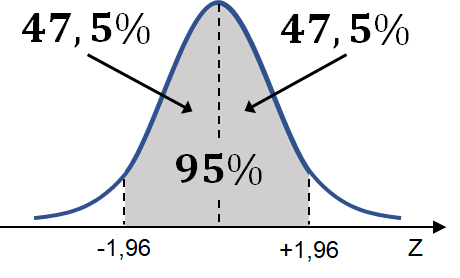

Como é função simétrica, esse valor positivo vai ser exatamente igual ao outro z negativo.

Para obtermos o z de outra forma sem usarmos a tabela, teremos ajuda do Python e do Scipy, pois importamos o norm do scipy.stats darmos uma aproximação mais sofisticada.

O z será igual a norm. Antes obtivemos com .cdf() recebendo o Z para retornarmos a Probabilidade, mas agora faremos o contrário; passaremos 0.975 para obtermos o z. Para isso, usaremos o método .ppf() recebendo a Probabilidade supondo que não tenhamos uma tabela.

In [ ]:
1.9 + 0.06

1.96

In [76]:
z = norm.ppf(0.975)
z

np.float64(1.959963984540054)

Como resultado, teremos 1.959963984540054, ou seja, aproximadamente 1.96. Em seguida no notebook, encontraremos uma tabela com os valores mais comuns de 90%, 95% e 99% de Níveis de Confiança.



### Valores de $z$ para os níveis de confiança mais utilizados

|Nível de<br>confiança|Valor da área sob<br>a curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0,95                               |1,645|
|95%               |0,975                              |1,96 |
|99%               |0,995                              |2,575|

### Obtendo $\sigma_\bar{x}$

Obteremos o x barra que é justamente o sigma sobre a raiz de n. O desvio padrão populacional de uma amostra no nosso problema é 150.

In [77]:
desvio_padrao = 150
desvio_padrao

150

Sabemos que n igual a 20 sacos da amostra.

In [78]:
n = 20
n

20

Em seguida, calcularemos a raiz_de_n igual a função .sqrt() do Numpy que calcula uma raiz quadrada, recebendo n. Com isso, teremos todos os elementos para calcularmos esse sigma x barra.

In [79]:
raiz_de_n = np.sqrt(n)
raiz_de_n

np.float64(4.47213595499958)

Como retorno, teremos 4.47213595499958.

Em seguida, a nova variável sigma será igual desvio_padrao dividido por raiz_de_n.

In [81]:
sigma = desvio_padrao / raiz_de_n
sigma

np.float64(33.54101966249684)

Feito isso, teremos mais um elemento da nossa fórmula.

Falta-nos obter o erro que é z vezes sigma sobre raiz de n. Na parte "Obtendo e", calcularemos o e que será igual a z vezes sigma.

### Obtendo $e$

In [82]:
e = z * sigma
e

np.float64(65.73919054324361)

Como retorno, teremos 65.73, ou seja, 65,75 gramas.

Veremos como calcular o Intervalo de Confiança de forma manual e depois de forma simples passando alguns parâmetros para termos um output.

Primeiro, chamaremos uma nova variável intervalo sendo igual a parênteses. Dentro, a média amostral representada pelo x barra da nossa fórmula. A variável media_amostra subtrairá o erro e por se tratar do Limite Inferior.

Faremos a mesma coisa em seguida para o Limite Superior que somará o erro e com a media_amostra, alterando por sinal, invertendo ele, menos e mais.

### Solução 1 - Calculando o intervalo de confiança para a média

In [83]:
intervalo = (
  media_amostra - e,
  media_amostra + e
)
intervalo

(np.float64(4984.260809456757), np.float64(5115.739190543243))

Nosso Intervalo de Confiança será (4984.260809456757, 5115.739190543243) com Nível de Confiança de 95%, ou seja, teremos uma probabilidade de 95% de o parâmetro da população estar dentro do intervalo.

A forma automática de calcular isso, com norm será usar o método .interval() recebendo o alfa de 0.95 e o parâmetro loc que representa o x barra da media_amostra que é 5050. O scale é justamente o sigma.

### Solução 2 - Calculando o intervalo de confiança para a média

In [ ]:
norm.interval(alpha = 0.95, loc = media_amostra, scale = sigma)

(4984.260809456757, 5115.739190543243)

Nota importante: Devido a uma atualização recente na biblioteca scipy.stats, o parâmetro alpha utilizado no vídeo e transcrito acima na função norm.interval deve ser substituído por confidence

In [84]:
norm.interval(confidence = 0.95, loc = media_amostra, scale = sigma)

(np.float64(4984.260809456757), np.float64(5115.739190543243))

O mesmo resultado anterior mostra que esta é outra forma de obtermos o Intervalo de Confiança de forma mais automática.

A seguir, utilizaremos informações obtidas na parte de Estimação. Aprenderemos a calcular e obter tamanho de amostra para que seja realmente representativa da População.

# <font color=green>5 CÁLCULO DO TAMANHO DA AMOSTRA</font>
***

## Margem de erro - Exercício

Para estimar o valor médio gasto por cada cliente de uma grande rede de fast-food, foi selecionada uma amostra de 50 clientes.

Assumindo que o valor do desvio padrão da população seja de R$ 6,00 e que esta população se distribui normalmente, obtenha a margem de erro desta estimativa para um nível de confiança de 95%.

In [85]:
import math
from scipy.stats import norm

desvio_padrao = 6
tamanho_amostra = 50
nivel_confianca = 0.95

z = norm.ppf(1 - (1 - nivel_confianca) / 2)
margem_erro = z * (desvio_padrao / math.sqrt(tamanho_amostra))

print(f"A margem de erro é: R$ {margem_erro:.2f}")


A margem de erro é: R$ 1.66


## <font color='red'>Problema </font>

Estamos estudando o rendimento mensal dos chefes de domicílios com renda até R$\$$ 5.000,00 no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 1.082,79**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

## <font color=green> O que aprendemos?</font>
***

Nesta aula, aprendemos:

   - A conceituação de parâmetros e de estimativa

   - O teorema do limite central

   - Níveis de confiança e de significância

   - A obter a margem de erro de um experimento

   - A obter intervalos de confiança para uma estimativa pontual (estimação intervalar)

## <font color=green>6.1 Variáveis quantitativas e população infinita</font>
***

# <font color=green>Cálculo para a população infinita</font>

# $$e = z \frac{\sigma}{\sqrt{n}}$$

#### Com desvio padrão conhecido

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

#### Com desvio padrão desconhecido

## $$n = \left(z\frac{s}{e}\right)^2$$

Onde:

$z$ = variável normal padronizada

$\sigma$ = desvio padrão populacional

$s$ = desvio padrão amostral

$e$ = erro inferencial

### <font color='red'>Observações</font>

1. O desvio padrão ($\sigma$ ou $s$) e o erro ($e$) devem estar na mesma unidade de medida.

2. Quando o erro ($e$) for representado em termos percentuais, deve ser interpretado como um percentual relacionado à média.

## <font color='blue'>Exemplo: Rendimento médio</font>

Estamos estudando o rendimento mensal dos chefes de domicílios no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 100,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 3.323,39**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

In [ ]:
0.95 / 2

0.475

In [ ]:
0.5 + (0.95 / 2)

0.975

In [ ]:
z = norm.ppf(0.975)
z

1.959963984540054

### Obtendo $\sigma$

In [ ]:
sigma = 3323.39
sigma

3323.39

### Obtendo $e$

In [ ]:
e = 100
e

100

### Obtendo $n$

In [ ]:
n = (z * (sigma / e)) ** 2
int(n.round())

4243

---
---

## <font color='red'>Problema</font>

Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **100 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

## <font color=green>5.2 Variáveis quantitativas e população finita</font>
***

#### Com desvio padrão conhecido

## $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

#### Com desvio padrão desconhecido

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Onde:

$N$ = tamanho da população

$z$ = variável normal padronizada

$\sigma$ = desvio padrão populacional

$s$ = desvio padrão amostral

$e$ = erro inferencial

## <font color='blue'>Exemplo: Indústria de refrigerantes</font>

Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **100 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

### Obtendo $N$

In [ ]:
N = 10000
N

10000

### Obtendo $z$

In [ ]:
z = norm.ppf((0.5 + (0.95 / 2)))
z

1.959963984540054

### Obtendo $s$

In [ ]:
s = 12
s

12

### Obtendo $e$

In [ ]:
e = 5
e

5

### Obtendo $n$

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

In [ ]:
n = ((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e**2) * (N - 1)))
int(n.round())

22

# <font color=green>6 FIXANDO O CONTEÚDO</font>
***

## <font color='blue'>Exemplo: Rendimento médio</font>

Estamos estudando o **rendimento mensal dos chefes de domicílios com renda até R$\$$ 5.000,00 no Brasil**. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 1.082,79** e que a **média populacional** é de **R$\$$ 1.426,54**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo? Qual o intervalo de confiança para a média considerando o tamanho de amostra obtido?

### Construindo o dataset conforme especificado pelo problema

In [ ]:
renda_5000 = dados.query('Renda <= 5000').Renda

In [ ]:
sigma = renda_5000.std()
sigma

In [ ]:
media = renda_5000.mean()
media

### Calculando o tamanho da amostra

### Calculando o intervalo de confiança para a média

### Realizando uma prova gráfica

In [ ]:
import matplotlib.pyplot as plt

tamanho_simulacao = 1000

medias = [renda_5000.sample(n = n).mean() for i in range(1, tamanho_simulacao)]
medias = pd.DataFrame(medias)

ax = medias.plot(style = '.')
ax.figure.set_size_inches(12, 6)
ax.hlines(y = media, xmin = 0, xmax = tamanho_simulacao, colors='black', linestyles='dashed')
ax.hlines(y = intervalo[0], xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')
ax.hlines(y = intervalo[1], xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')
ax